# 1. Documentación
Solicitud de citación:
  Este conjunto de datos está disponible públicamente para la investigación. Los detalles se describen en [Moro et al., 2014].
  Incluya esta cita si planea utilizar esta base de datos:

  [Moro et al., 2014] S. Moro, P. Cortez y P. Rita. Un enfoque basado en datos para predecir el éxito del telemarketing bancario. Decision Support Systems, en prensa, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Disponible en: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Título: Marketing bancario (con contexto social/económico)

2. Fuentes
   Creado por: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) y Paulo Rita (ISCTE-IUL) @ 2014
   
3. Uso pasado:

  El conjunto de datos completo (bank-additional-full.csv) se describió y analizó en:

  S. Moro, P. Cortez y P. Rita. Un enfoque basado en datos para predecir el éxito del telemarketing bancario. Sistemas de apoyo a la toma de decisiones (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Información relevante:

   Este conjunto de datos se basa en el conjunto de datos UCI "Bank Marketing" (consulte la descripción en: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   Los datos se enriquecen con la adición de cinco nuevas características/atributos sociales y económicos (indicadores nacionales de un país con una población de ~10 millones), publicados por el Banco de Portugal y disponibles públicamente en: https://www.bportugal.pt/estatisticasweb .
   Este conjunto de datos es casi idéntico al utilizado en [Moro et al., 2014] (no incluye todos los atributos debido a problemas de privacidad).
   Usando el paquete rminer y la herramienta R (http://cran.r-project.org/web/packages/rminer/), encontramos que la adición de los cinco nuevos atributos sociales y económicos (disponibles aquí) conducen a una mejora sustancial en la predicción de un éxito, incluso cuando no se incluye la duración de la llamada. Nota: el archivo se puede leer en R usando: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   El archivo zip incluye dos conjuntos de datos:
      1) bank-additional-full.csv con todos los ejemplos, ordenados por fecha (de mayo de 2008 a noviembre de 2010).
      2) bank-additional.csv con el 10 % de los ejemplos (4119), seleccionados aleatoriamente de bank-additional-full.csv.
   El conjunto de datos más pequeño se proporciona para probar algoritmos de aprendizaje automático más exigentes desde el punto de vista computacional (por ejemplo, SVM).

   El objetivo de la clasificación binaria es predecir si el cliente suscribirá un depósito bancario a plazo (variable y).

5. Número de instancias: 41188 para banco-adicional-completo.csv

6. Número de atributos: 20 + atributo de salida.

7. Información de atributos:

   Para obtener más información, lea [Moro et al., 2014].

   Variables de entrada:
   # Datos del cliente del banco:
   1 - edad (numérico)
   2 - trabajo : tipo de trabajo (categórico: "administrador", "obrero", "empresario", "criada", "administración", "jubilado", "autónomo", "servicios", "estudiante" ,"técnico","desempleado","desconocido")
   3 - civil : estado civil (categórico: "divorciado","casado","soltero","desconocido"; nota: "divorciado" significa divorciado o viudo)
   4 - educación (categórico: "básico.4y","básico.6y","básico.9y","bachillerato","analfabetos","curso.profesional","título.universitario","desconocido")
   5- default: tiene credito en default? (categórico: "no","sí","desconocido")
   6 - vivienda: tiene préstamo de vivienda? (categórico: "no","sí","desconocido")
   7 - préstamo: tiene préstamo personal? (categórico: "no","sí","desconocido")
   # Relacionado con el último contacto de la campaña actual:
   8 - contacto: tipo de comunicación del contacto (categórico: "celular","teléfono")
   9 - mes: último mes de contacto del año (categóricos: "ene", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: último día de contacto de la semana (categórico: "lunes", "martes", "miércoles", "jueves", "vie")
  11 - duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = "no"). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es obviamente conocido. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.
   # Otros atributos:
   12 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)
  13 - pdays: número de días que transcurrieron desde la última vez que se contactó al cliente de una campaña anterior (numérico; 999 significa que no se contactó al cliente previamente)
  14 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  15 - poutcome: resultado de la campaña de marketing anterior (categórico: "fracaso","inexistente","éxito")
   # Atributos del contexto social y económico:
  16 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
  17 - cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
  18 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
  19 - euribor3m: tasa euribor 3 meses - indicador diario (numérico)
  20 - nr.employed: número de empleados - indicador trimestral (numérico)

  Variable de salida (objetivo deseado):
  21 - y - ¿El cliente ha suscrito un depósito a plazo? (binario: "sí","no")

8. Valores de atributos faltantes: hay varios valores faltantes en algunos atributos categóricos, todos codificados con la etiqueta "desconocido". Estos valores faltantes pueden tratarse como una posible etiqueta de clase o mediante técnicas de supresión o imputación.

# 2. Carga y precocesamiento de datos
En este caso vamos a usar el archivo reducido para optimizar el trabajo.

# Librerías básicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-additional.csv')
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."
...,...
4114,"30;""admin."";""married"";""basic.6y"";""no"";""yes"";""y..."
4115,"39;""admin."";""married"";""high.school"";""no"";""yes""..."
4116,"27;""student"";""single"";""high.school"";""no"";""no"";..."
4117,"58;""admin."";""married"";""high.school"";""no"";""no"";..."


Como podemos ver no está bien formateado. Para ello especificaremos la separación de las columnas y volveremos a cargarlo.

In [3]:
df = pd.read_csv('bank-additional.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Como podemos ver, los valores nulos vienen dados por el string ``unknown``, así que antes de decidir que hacer con ellos, vamos a sustituirmos por np.nan.

In [4]:
df.replace(['unknown'], np.nan, inplace = True)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Vamos a echar un vistazo a la forma que tienen los datos faltantes.

In [6]:
df.isna().sum().sort_values(ascending = False)

default           803
education         167
housing           105
loan              105
job                39
marital            11
age                 0
poutcome            0
nr.employed         0
euribor3m           0
cons.conf.idx       0
cons.price.idx      0
emp.var.rate        0
duration            0
previous            0
pdays               0
campaign            0
day_of_week         0
month               0
contact             0
y                   0
dtype: int64

In [7]:
df.isna().sum().sort_values(ascending = False)/df.shape[0]*100

default           19.495023
education          4.054382
housing            2.549162
loan               2.549162
job                0.946832
marital            0.267055
age                0.000000
poutcome           0.000000
nr.employed        0.000000
euribor3m          0.000000
cons.conf.idx      0.000000
cons.price.idx     0.000000
emp.var.rate       0.000000
duration           0.000000
previous           0.000000
pdays              0.000000
campaign           0.000000
day_of_week        0.000000
month              0.000000
contact            0.000000
y                  0.000000
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Vamos a decidir que hacer con ellos empezando desde abajo hacia arriba.

In [9]:
df.marital.value_counts()

married     2509
single      1153
divorced     446
Name: marital, dtype: int64

Para la columna ``marital`` vamos a sustituirlos por ``single``, ya que el hecho de que falten esos datos es propablemente porque no hay registro de algún estado civil contraído, además conforman un porcentaje muy bajo de datos con respecto al total, por lo que podemos arriesgarnos.

In [10]:
df['marital'].replace([np.nan], 'single', inplace = True)

In [11]:
df.job.value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
Name: job, dtype: int64

Para la columna `job` vamos a sustituirlos por ``unemployed`` por la misma razón que la anterior.

In [12]:
df['job'].replace([np.nan], 'unemployed', inplace = True)

In [13]:
df.loan.value_counts()

no     3349
yes     665
Name: loan, dtype: int64

Para la columna ``loan`` vamos reemplazarlos por ``no`` ya que es lo más normal y además entra en juego la misma razón.

In [14]:
df['loan'].replace([np.nan], 'no', inplace = True)

In [15]:
df.housing.value_counts()

yes    2175
no     1839
Name: housing, dtype: int64

Para ``housing`` vemos que la moda es ``yes``, aunque no está tan claro que hacer como en las anteriores. Sin embargo, dando por sentado que no tenían préstamo personal, siendo lo mayoritario que tengan préstamo de vivienda y teniendo en en cuenta que los datos conforman entorno a un 2.5% con respecto al total, vamos a optar por tratarlos afirmativamente.

In [16]:
df['housing'].replace([np.nan], 'yes', inplace = True)

In [17]:
df.education.value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
illiterate                1
Name: education, dtype: int64

Es muy poco probable que alguien sea analfabeto, así que faltando los datos sobre educación de alguien vamos a asumir que no terminó ningún periodo de enseñanza y los encasillaremos como ``basic.4y``, que es lo más bajoy teniendo en mente que suman entorno a un 4%.

In [18]:
df['education'].replace([np.nan], 'basic.4y', inplace = True)

In [19]:
df.default.value_counts()

no     3315
yes       1
Name: default, dtype: int64

Sólo una persona tiene un préstamos en ``default``, así que estaríamos metiendo la pata seguramente si no asumimos que los valores faltantes sean negativos.

In [20]:
df['default'].replace([np.nan], 'no', inplace = True)

In [21]:
df.isna().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

Con esto y echando un vistazo de nuevo para comprobar que todo está bien, terminamos de tratar los valores faltantes. Ahora vamos a tratar las columnas.

In [22]:
np.array(df.columns.where(df.dtypes == object))

array([nan, 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', nan, nan, nan, nan, 'poutcome',
       nan, nan, nan, nan, nan, 'y'], dtype=object)

In [23]:
df.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed'], dtype=object)

Vamos a simplificar las etiquetas de ``job``, ya que algunas son prácticamente lo mismo.

In [24]:
df['job'].replace('self-employed', 'entrepreneur', inplace = True)
df['job'].replace('admin.', 'management', inplace = True)
df['job'].replace(['retired','student'], 'unemployed', inplace = True)
df['job'].replace('housemaid', 'services', inplace = True)
df['job'].replace('blue-collar', 'worker', inplace = True)

In [25]:
df.contact.unique()

array(['cellular', 'telephone'], dtype=object)

Dropeamos la columna ``contact`` ya que no es relevante que la llamada se haga desde un móvil o un teléfono.

In [26]:
df.drop(['contact'], axis = 1, inplace=True)

In [27]:
df.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)

Vamos a simplificar aquí también.

In [28]:
df['education'].replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic',  inplace = True)

In [29]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

Si echamos la vista atrás veremos que dentro de los divorciados se incluyen los viudos. Teniendo eso en cuenta y que a mi parecer no hay gran diferencia con respecto a soltero(puede haber pagos y acuerdos entre la pareja pero no podemos saber en qué dirección), haremos que la columna muestre únicamente si está casado o no.

In [30]:
df['marital'].replace('divorced', 'single',  inplace = True)
df['marital'].replace('single', 0,  inplace = True)
df['marital'].replace('married', 1,  inplace = True)


El día de la semana de lunes a viernes en que se produjo la llamada es tan relativo que no me parece que aporte algo valioso, así que vamos a dropearla también.

In [31]:
df.drop(['day_of_week'], axis = 1, inplace=True)

In [32]:
df.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

Aquí vamos a hacer que muestre si tuvo éxito o no, ya que es lo que en mi opinión puede llegar a sumar.

In [33]:
df['poutcome'].replace('nonexistent', 'failure',  inplace = True)
df['poutcome'].replace('failure', 0,  inplace = True)
df['poutcome'].replace('success', 1,  inplace = True)

A continuación vamos a hacer númericas las columnas que tienen ``yes`` o  ``no``, dándoles valores 1 o 0.

In [34]:
df['default'].replace('yes', 1, inplace = True)
df['default'].replace('no', 0, inplace = True)
df['housing'].replace('yes', 1, inplace = True)
df['housing'].replace('no', 0, inplace = True)
df['loan'].replace('yes', 1, inplace = True)
df['loan'].replace('no', 0, inplace = True)
df['y'].replace('yes', 1, inplace = True)
df['y'].replace('no', 0, inplace = True)

In [35]:
np.array(df.columns.where(df.dtypes == float))

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', nan], dtype=object)

# 3. Análisis exploratiorio de datos

Vamos a ver la correlación que hay entre las variables. Primero las categóricas y después las numéricas.

In [36]:
cdf = pd.crosstab(df.job, df.education)
cdf

education,basic,high.school,illiterate,professional.course,university.degree
job,,,,,
entrepreneur,98,32,0,26,151
management,152,352,0,45,787
services,165,265,0,33,40
technician,70,95,0,330,196
unemployed,173,88,1,52,84
worker,740,89,0,49,6


H0 : las muestras son independientes.
H1 : existe una dependencia entre las muestras.

In [116]:
from scipy.stats import chi2_contingency
table = [cdf]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=2835.184, p=0.000
Probablemente dependientes


H1 : existe una dependencia entre las muestras.

Parecen estar bastante relacionadas. Month no lo vamos a comprobar, puesto que no tiene sentido.

<AxesSubplot:>

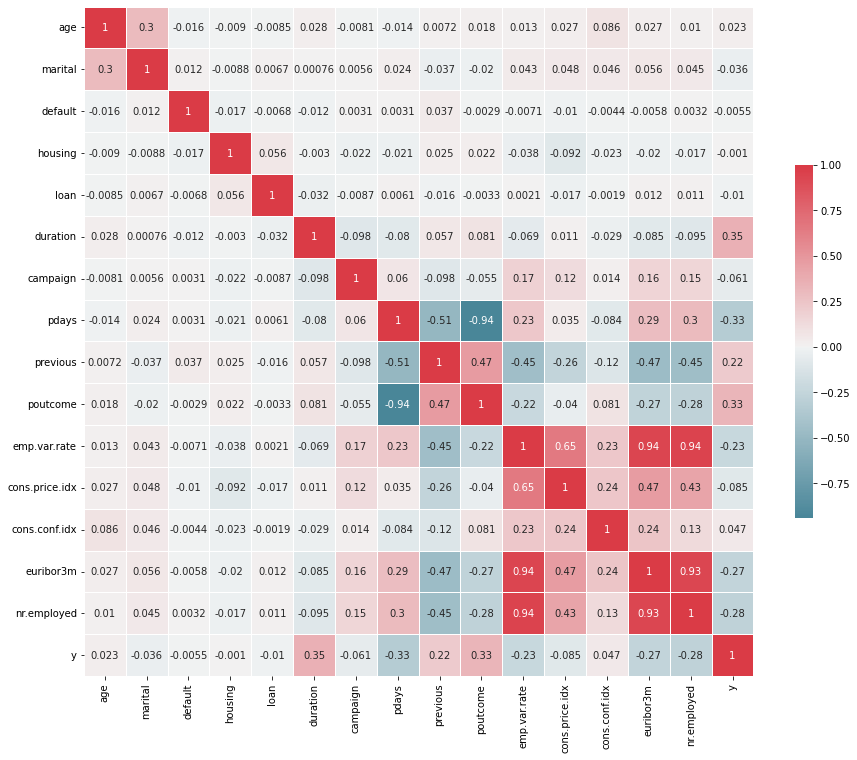

In [38]:
corr = df.drop(['job', 'education', 'month'], axis = 1).corr(method = 'spearman')
f, ax = plt.subplots(figsize=(15,13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

<AxesSubplot:>

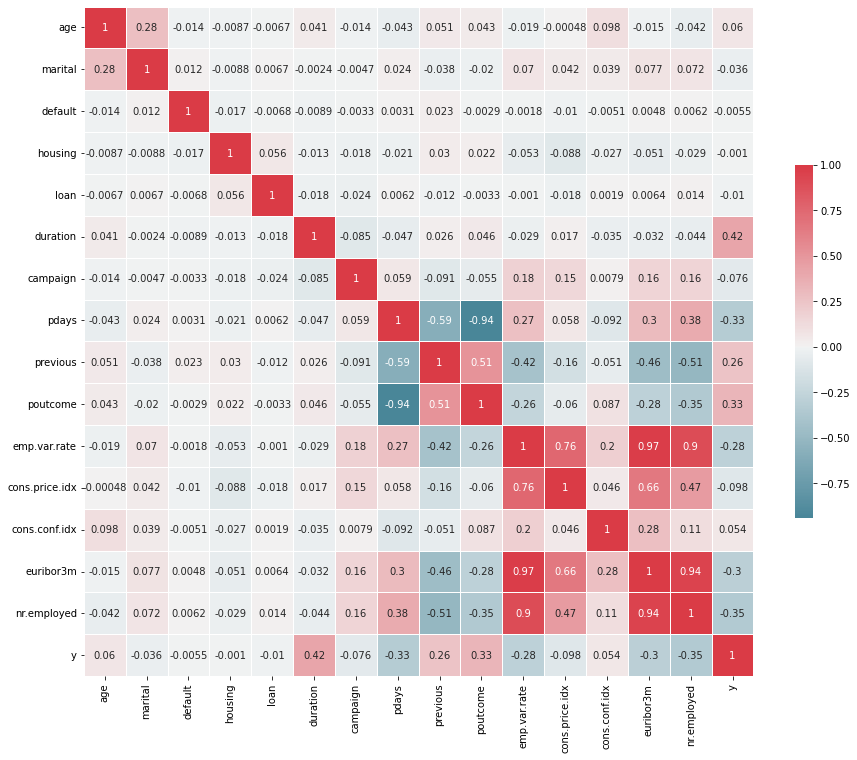

In [39]:
corr = df.drop(['job', 'education', 'month'], axis = 1).corr(method = 'pearson')
f, ax = plt.subplots(figsize=(15,13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Conclusiones sobre las correlaciones

``poutcome`` describe el exito o fracaso de la campaña anterior y ``pdays`` los días que han transcurrido desde que se contacto al cliente de la campaña anterior. Por tanto tiene mucho sentido que tengan una correlación inversa, puesto que si la campaña ha tenido exito no se contacta de nuevo con el cliente mientras que si ha fracasado se vuelve a contactar en un periodo corto de tiempo.

Por otro lado, ``emp.var.rate`` es la tasa de variación del empleo y ``nr.employed`` el número de empleados, por lo que es obvio que puediera haber una correlación alta.

En cuanto al ``euribor3m`` que es la tasa del euribor(El euríbor ​ es un índice de referencia publicado diariamente que indica el tipo de interés promedio al que un gran número de bancos europeos dicen concederse préstamos a corto plazo entre ellos para prestárselo a terceros -particulares y empresas-.​ Es un tipo de interés del mercado interbancario del euro.​​) con respecto a las dos anteriores mencionadas, a priori pienso que si sube podría afectar negativamente pero según la matriz es positivo para los empleados. Quizá para contrarrestar el efecto negativo se contraten más empleados para intentar hacer más préstamos y paliar posibles pérdidas.


Vamos a visualizar los datos de las variables.

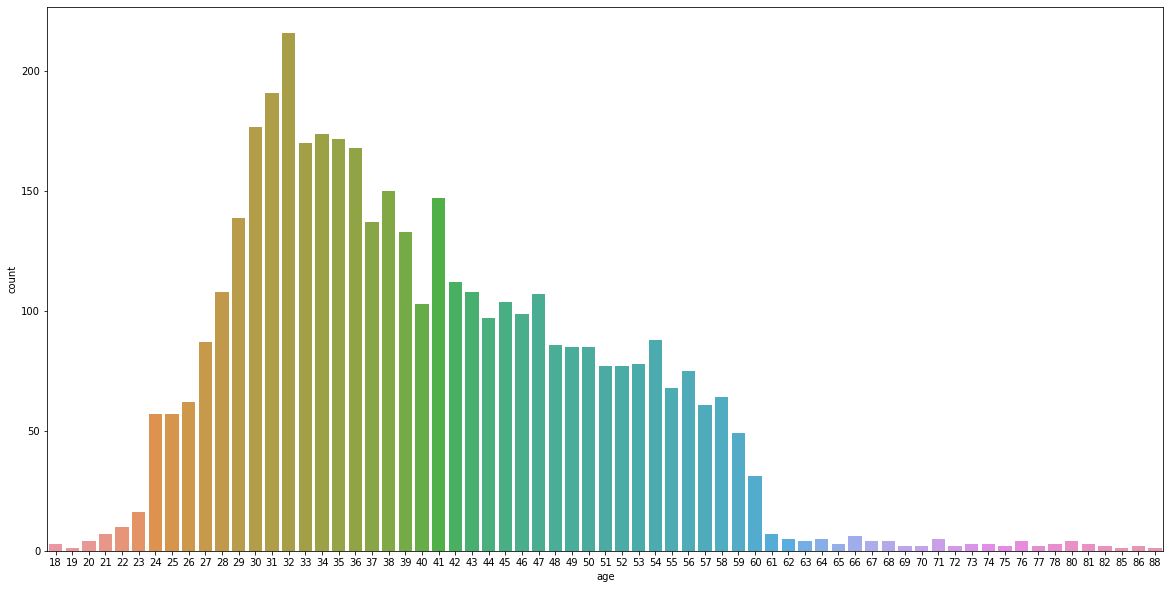

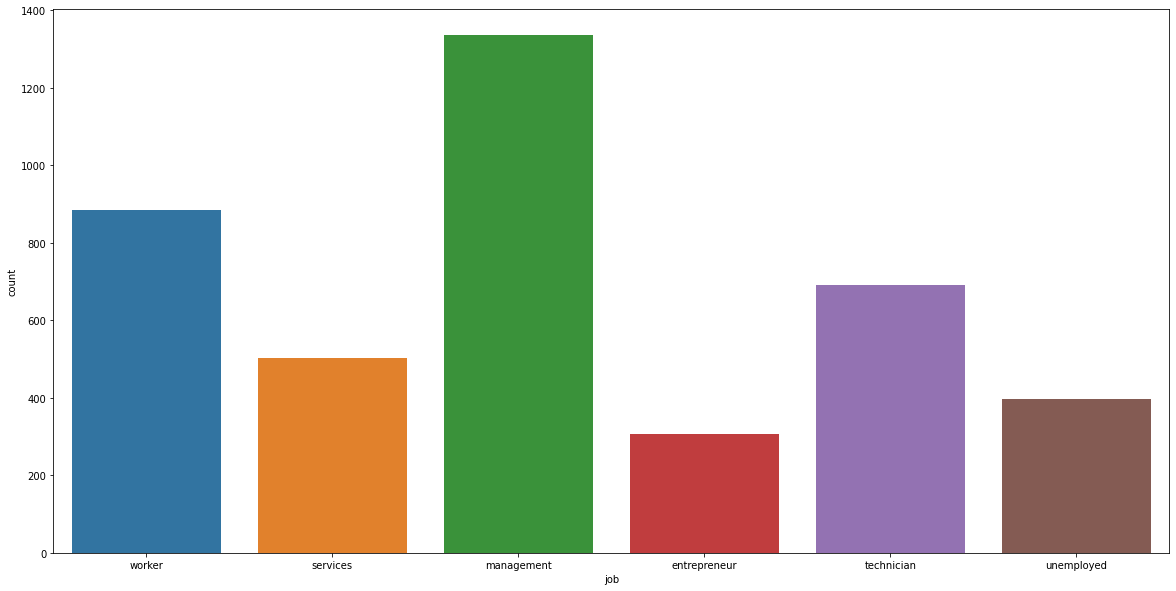

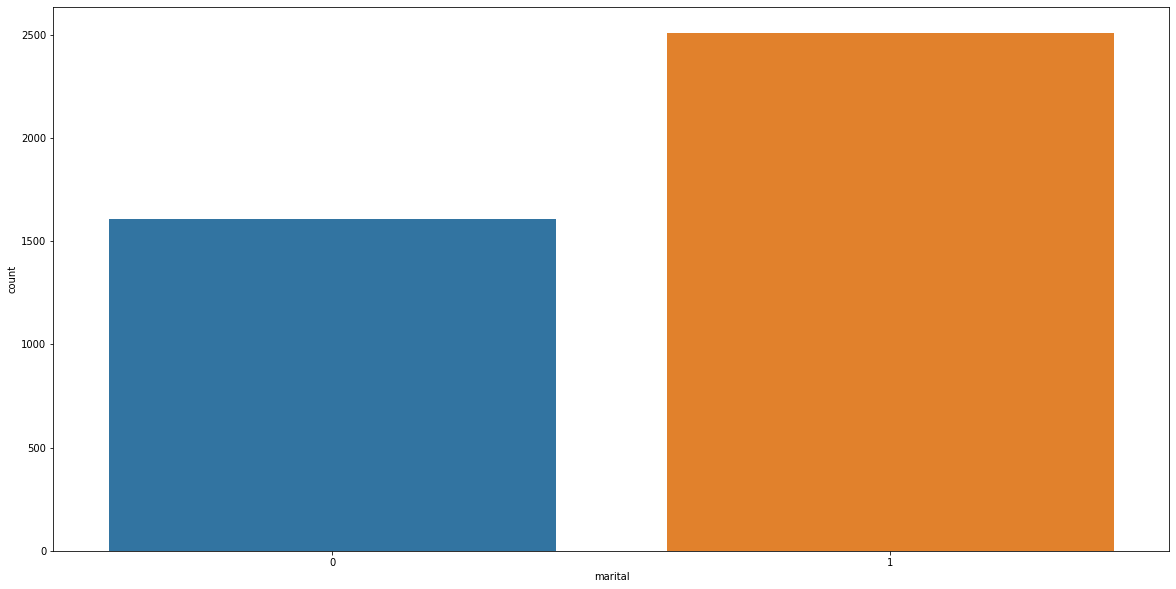

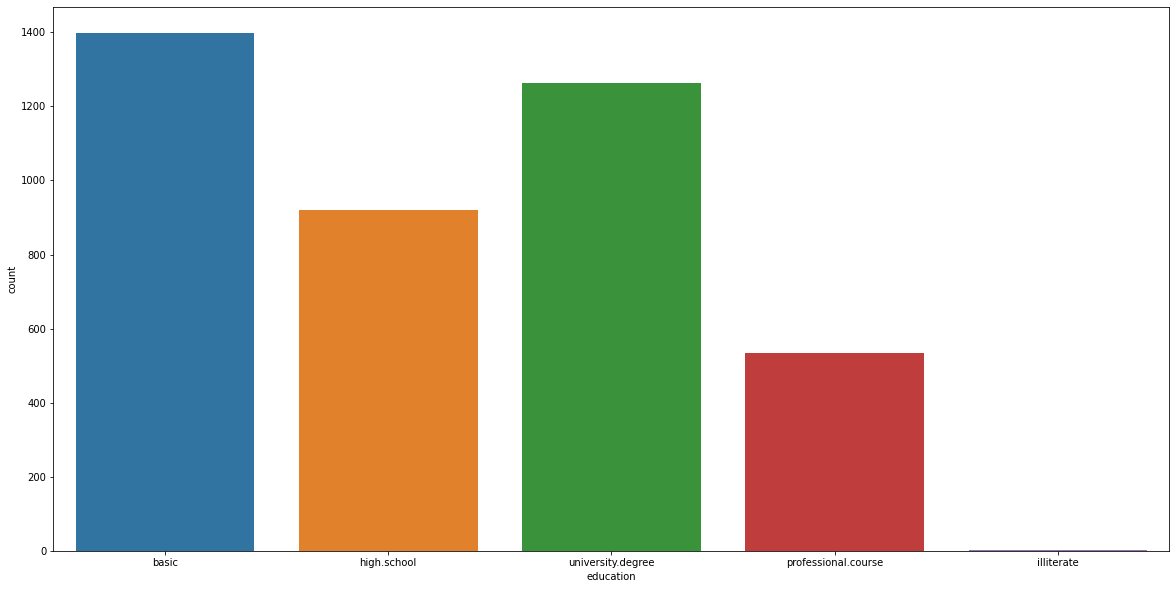

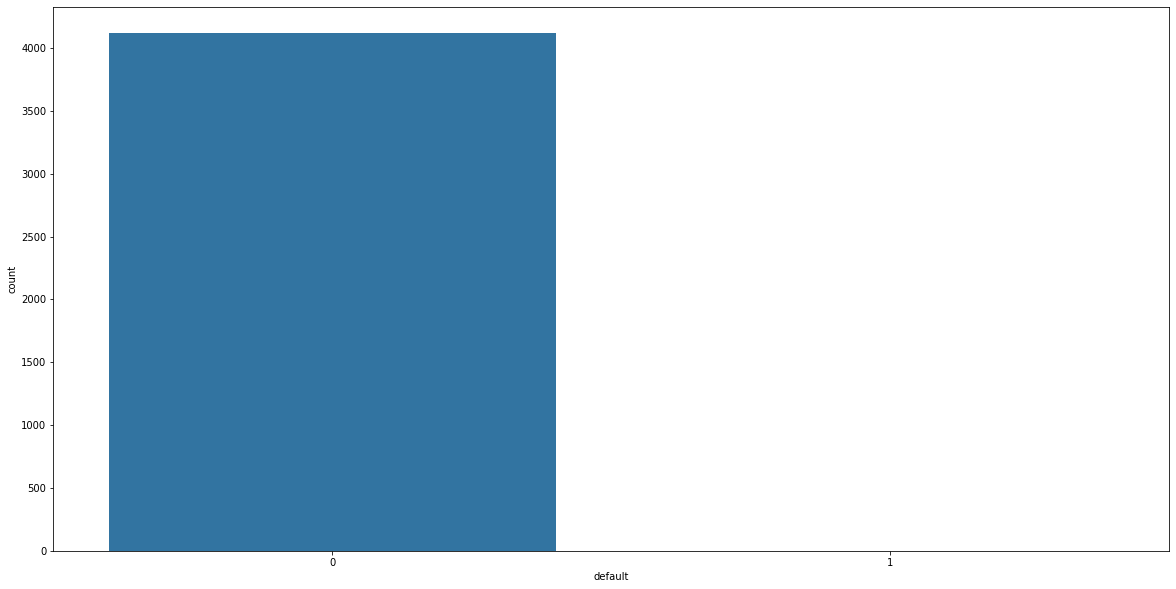

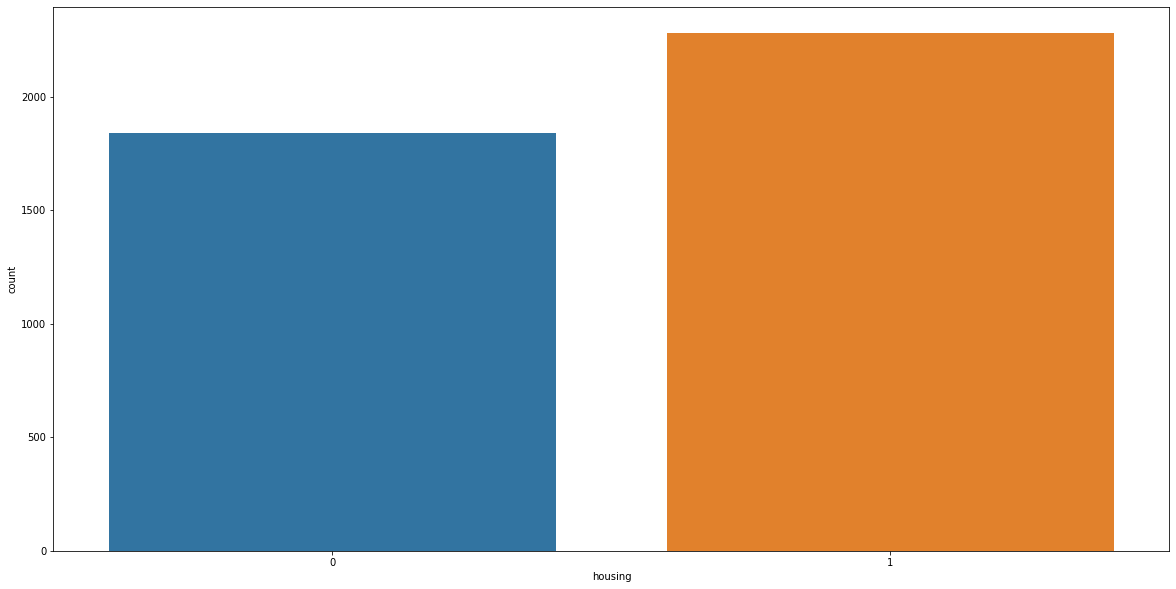

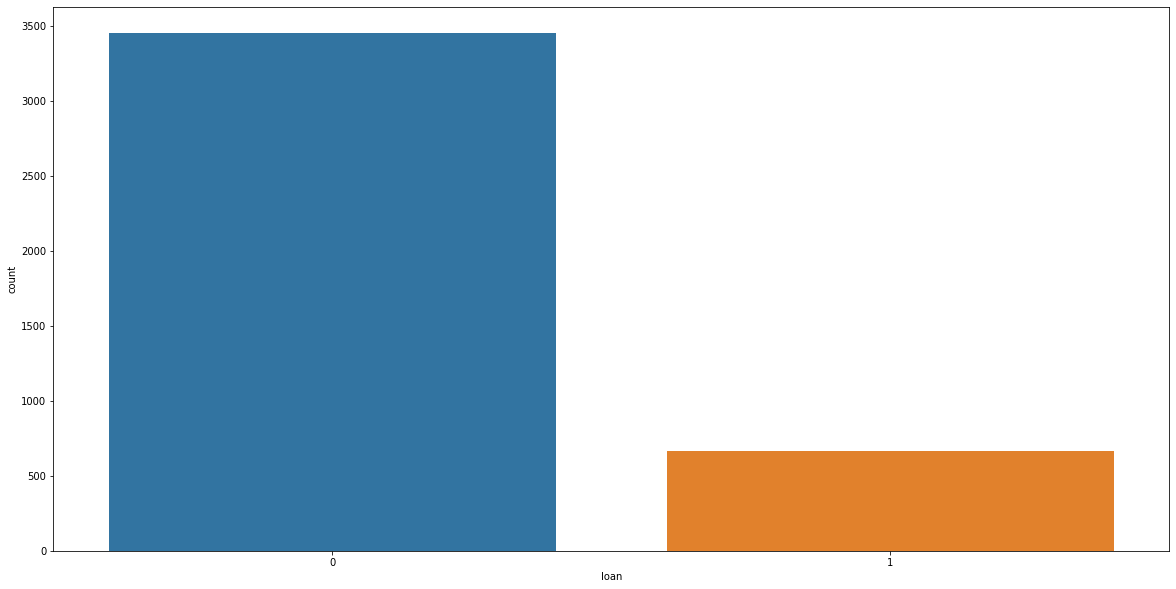

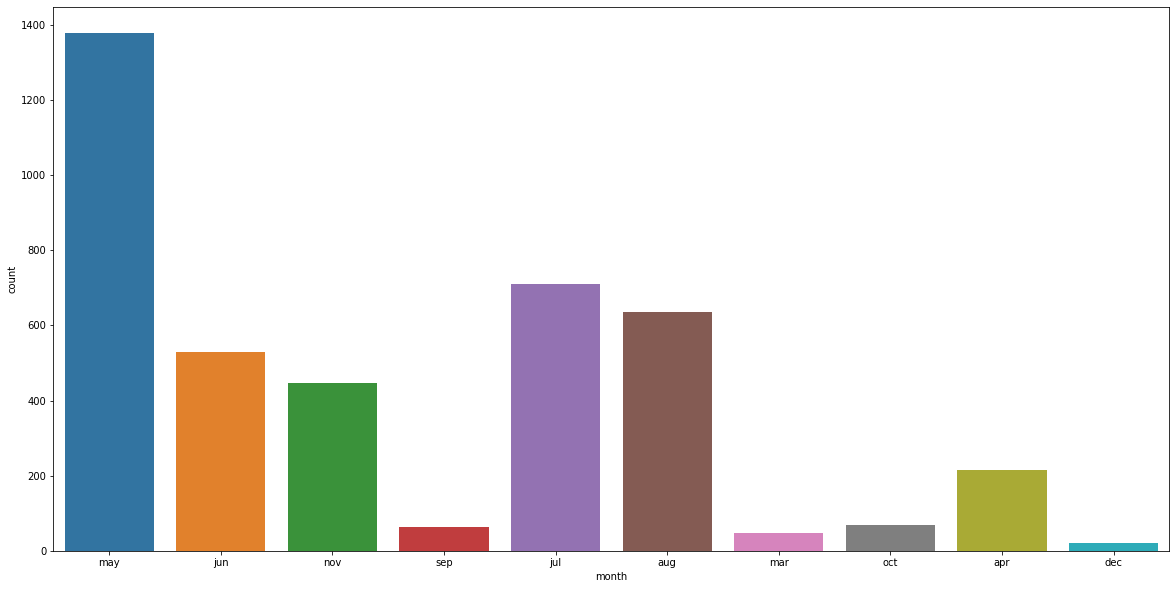

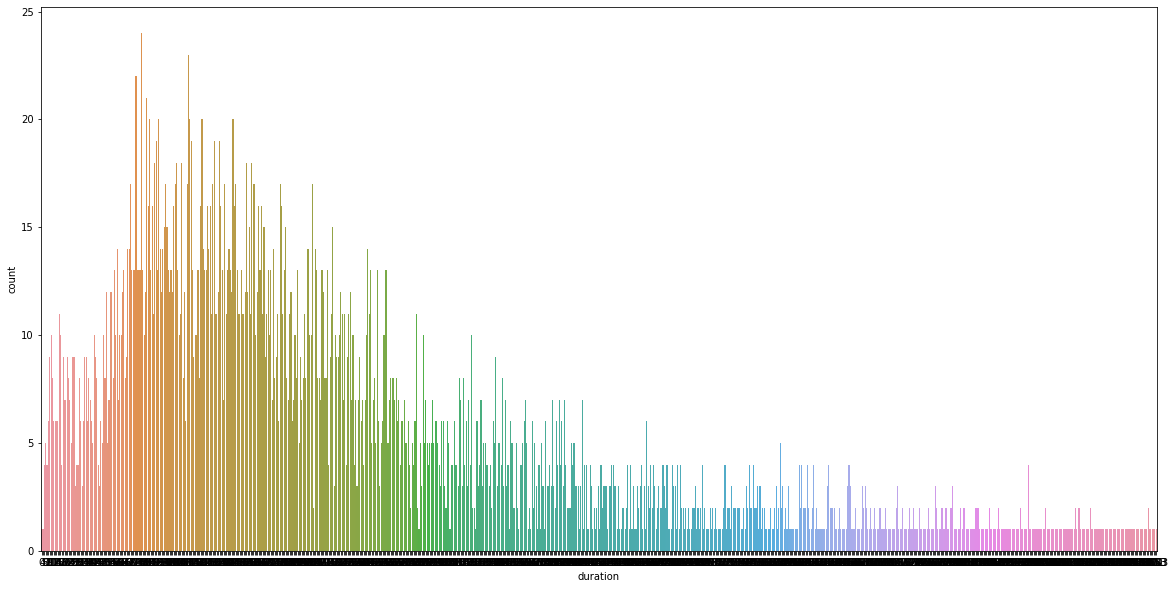

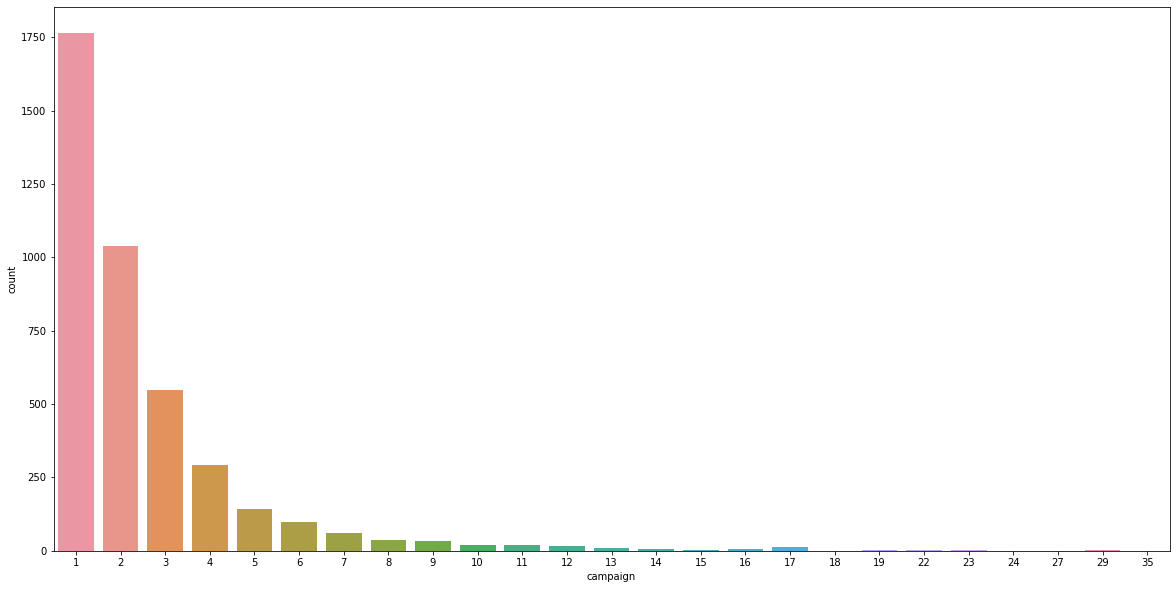

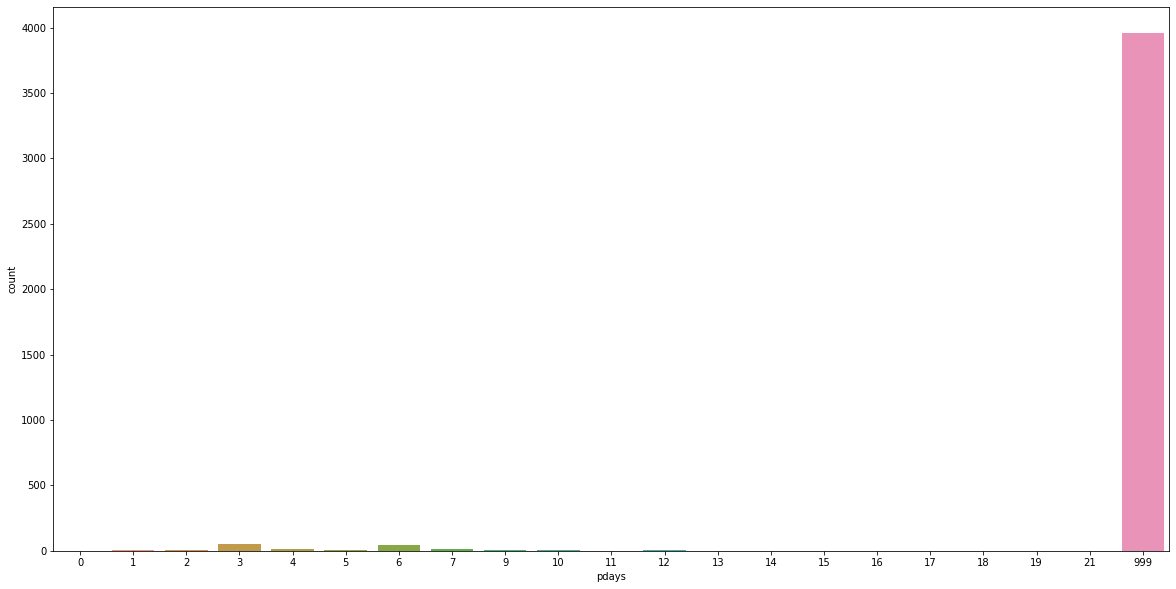

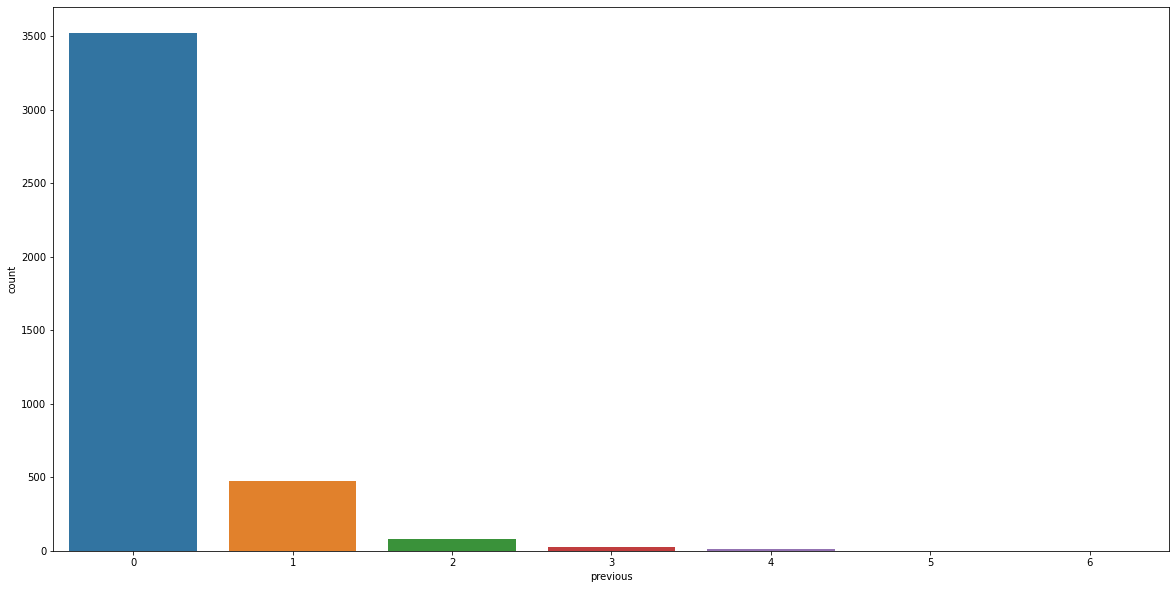

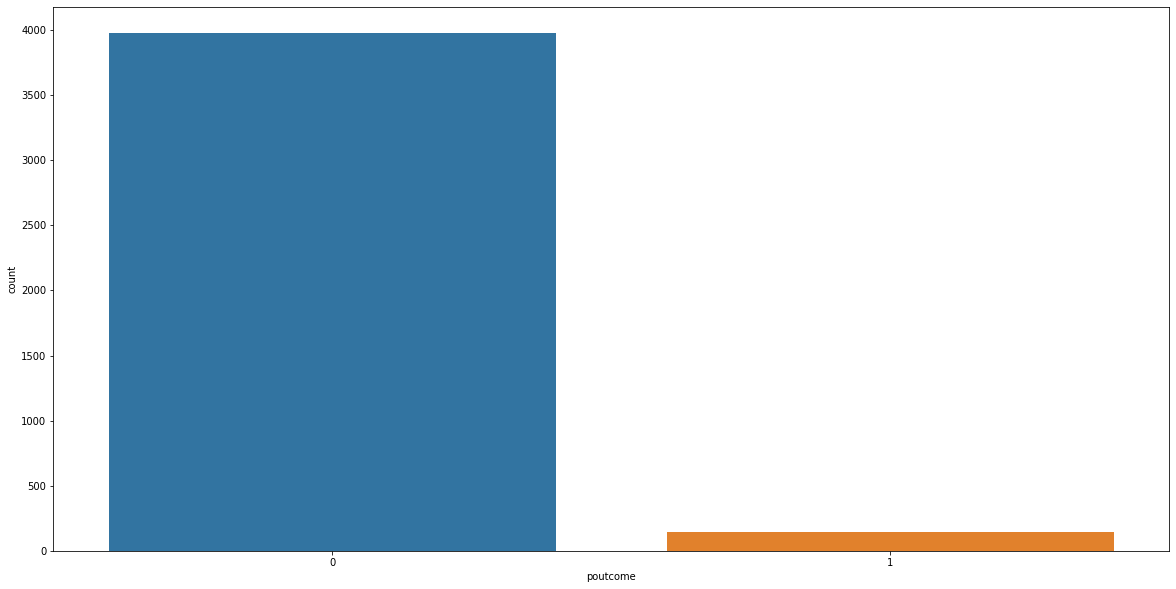

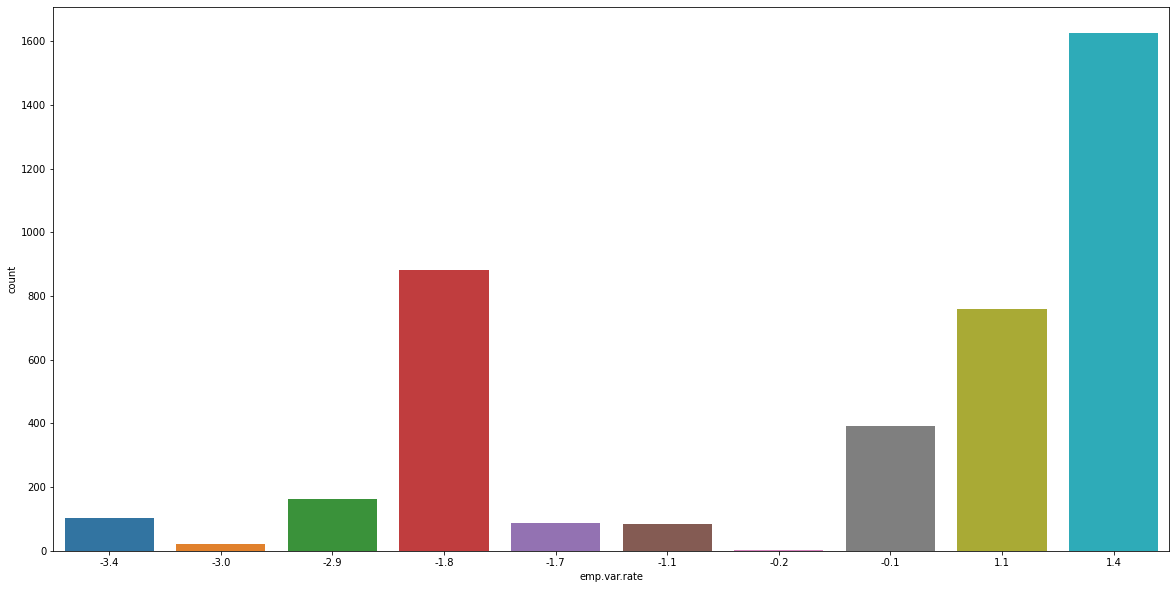

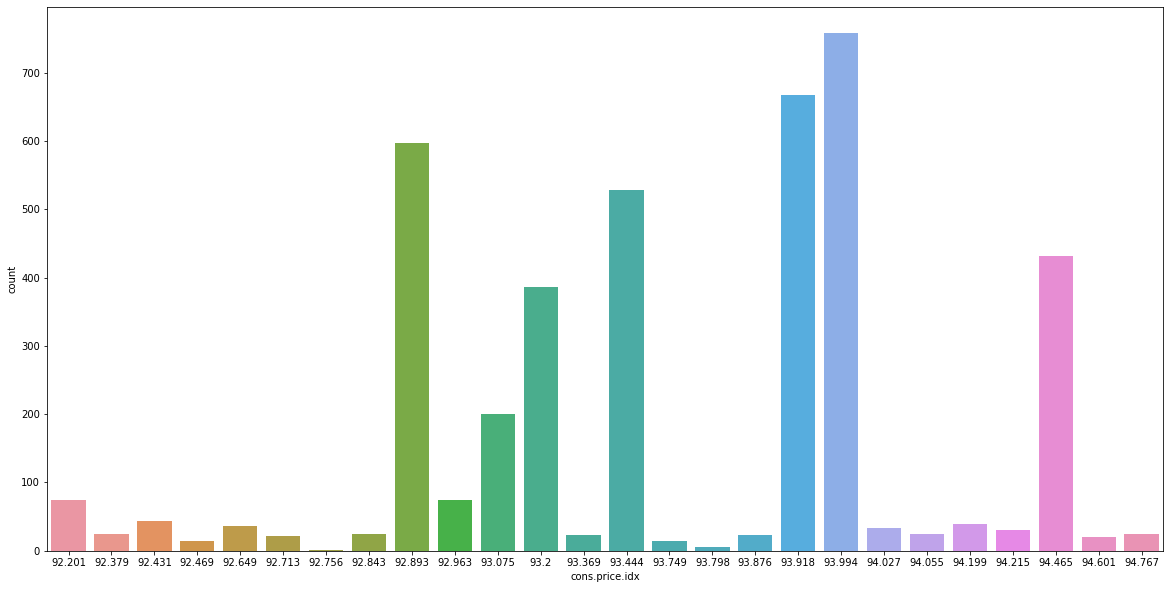

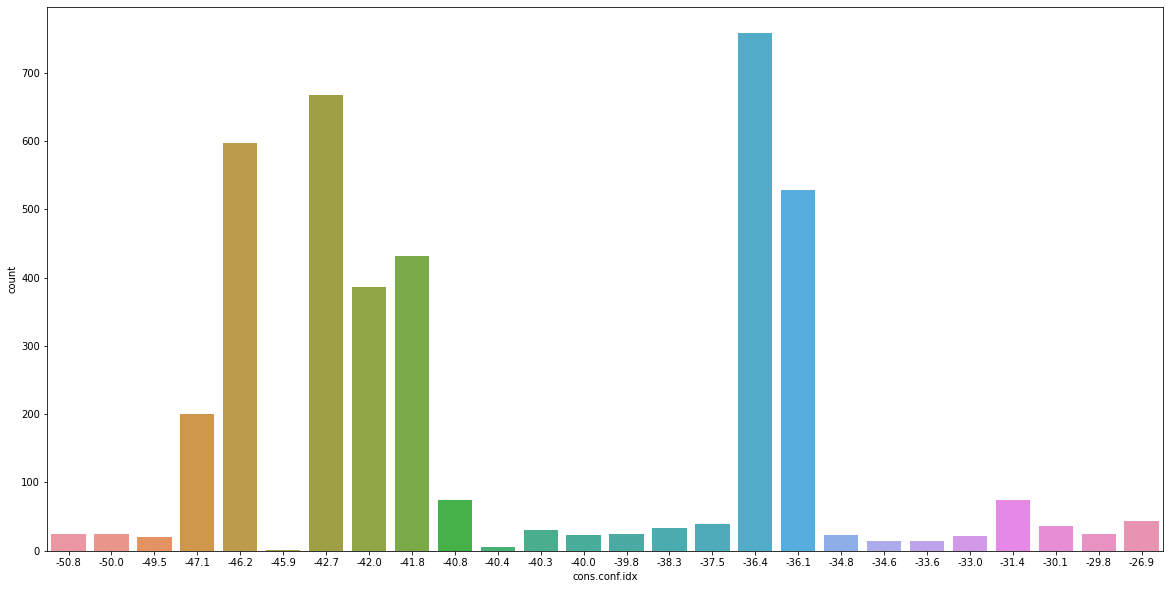

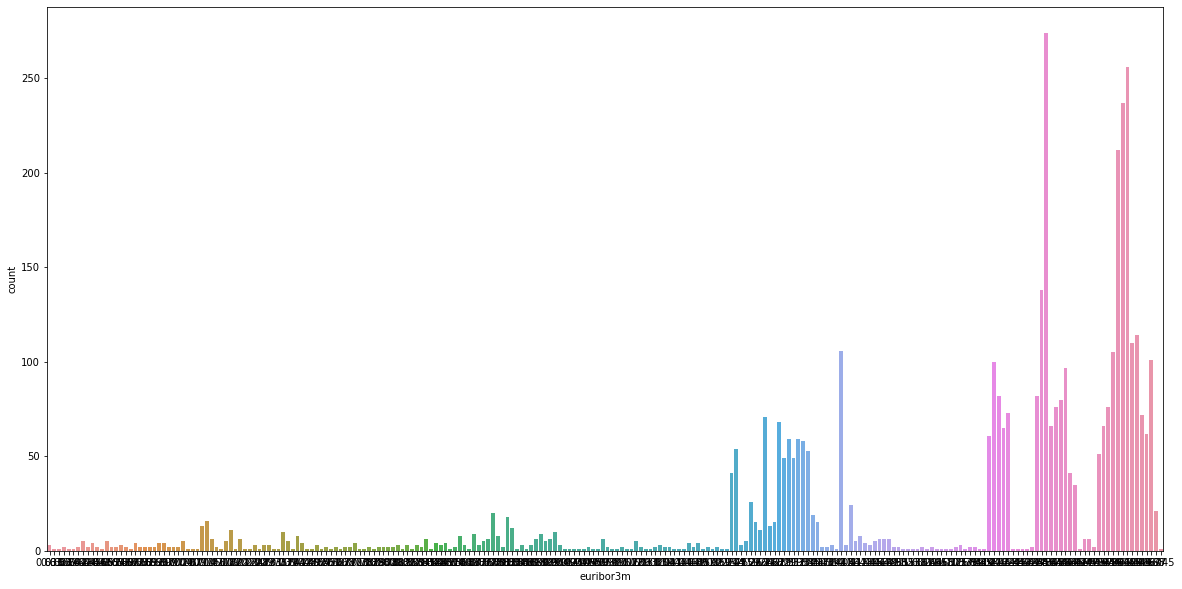

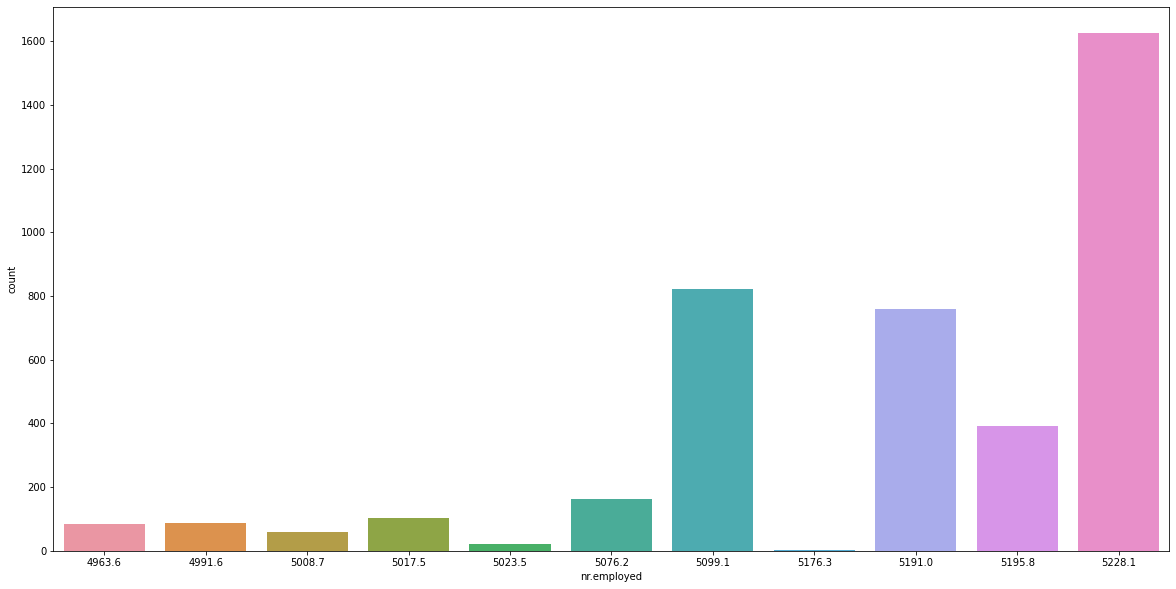

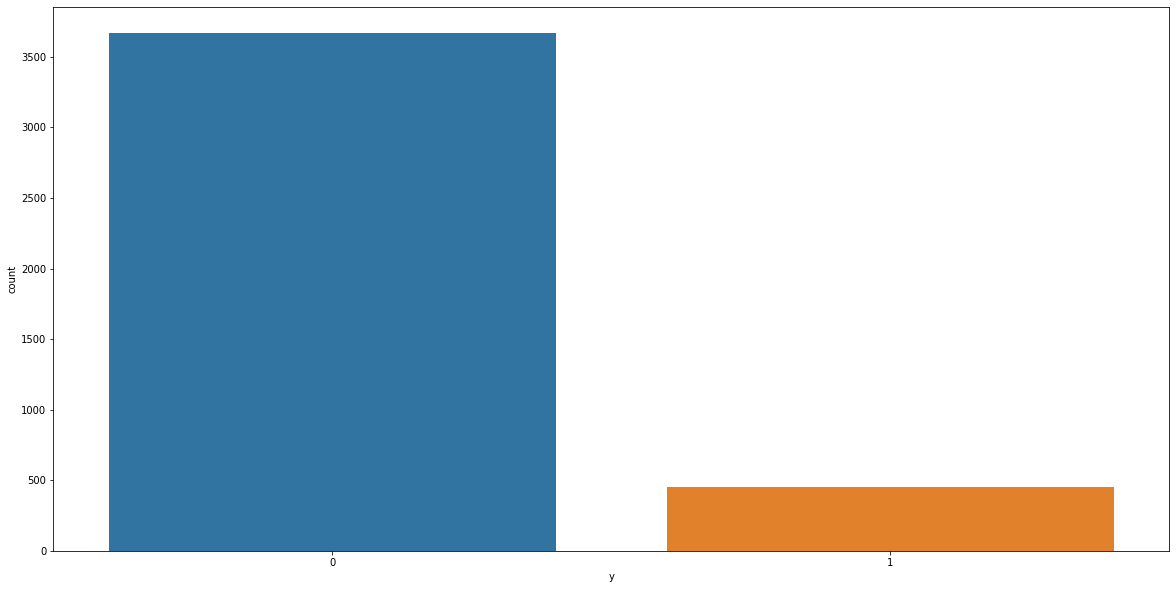

In [40]:
cols = df.columns
for i in range(0,len(cols)):
  plt.figure(figsize = (20,10))
  sns.countplot(x = cols[i],data = df)

Vamos a echar un vistazo a la distribución de las variables.

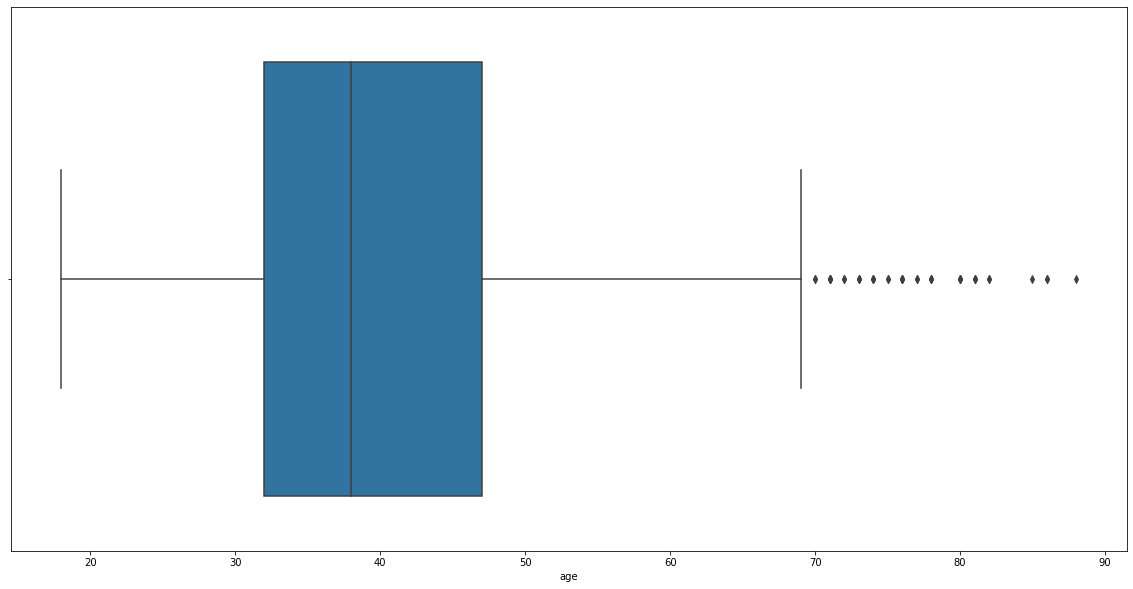

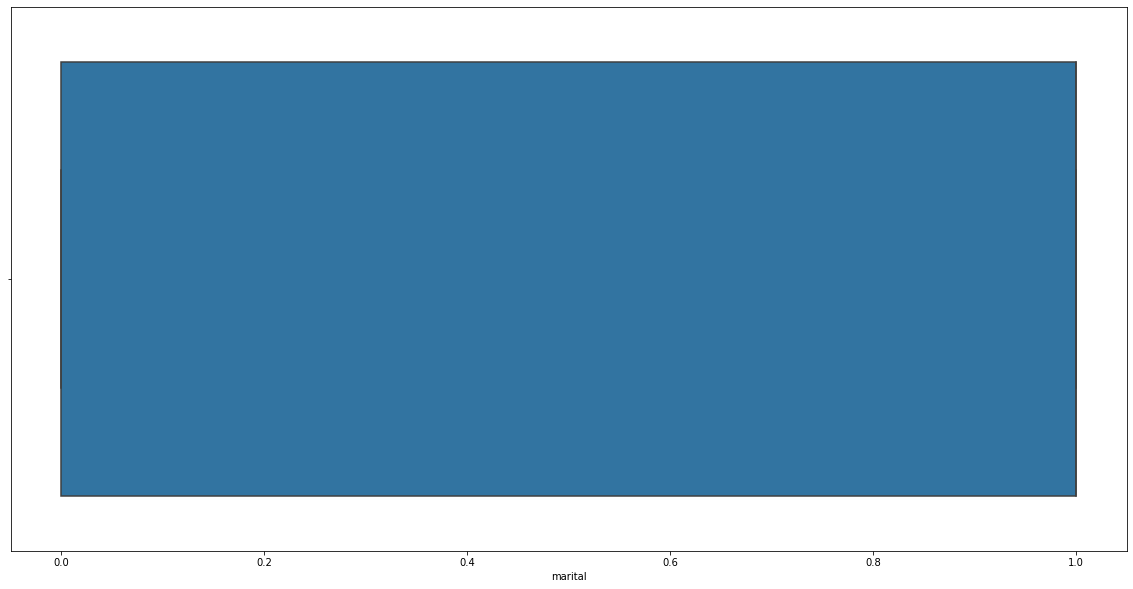

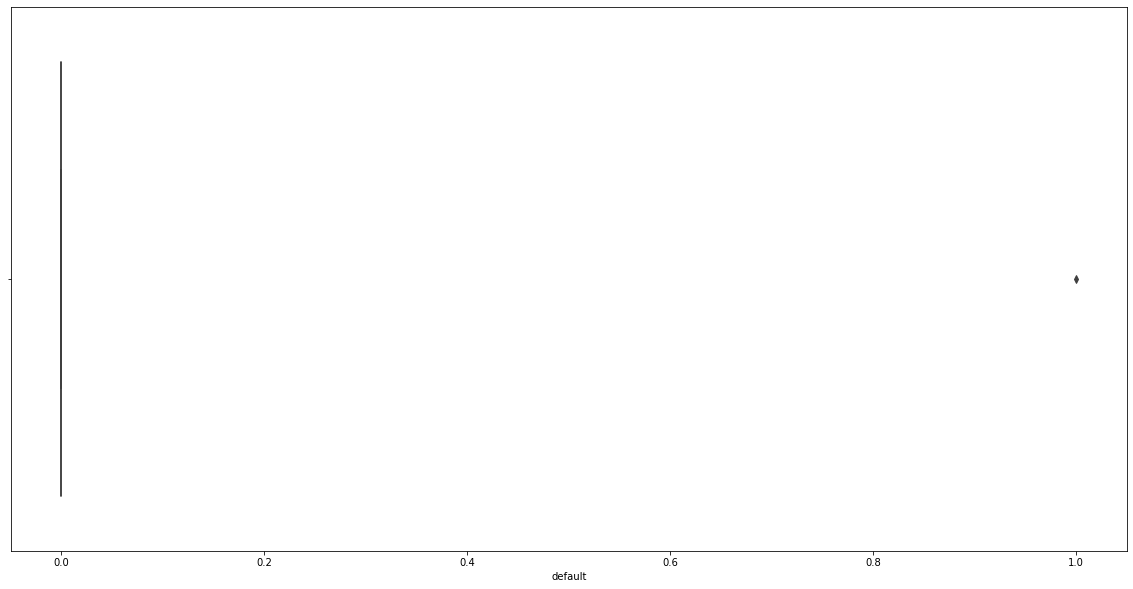

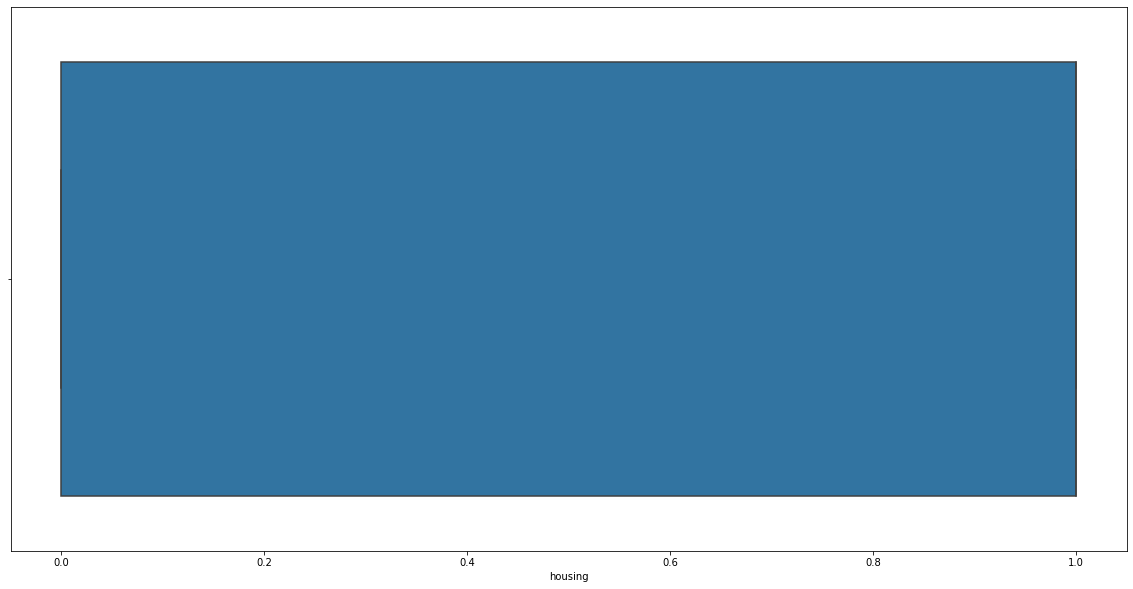

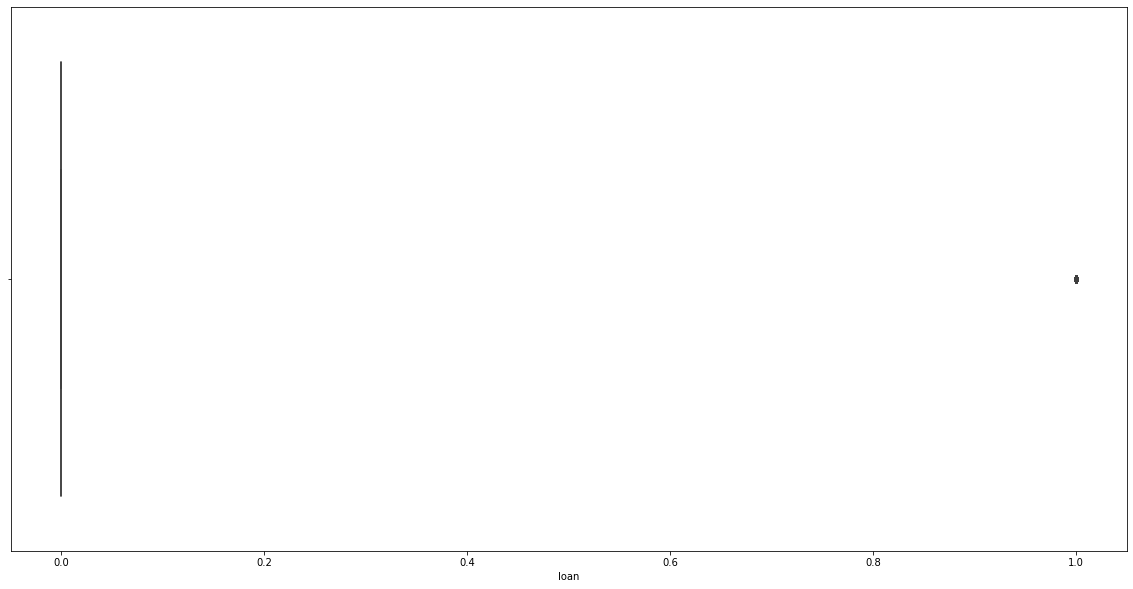

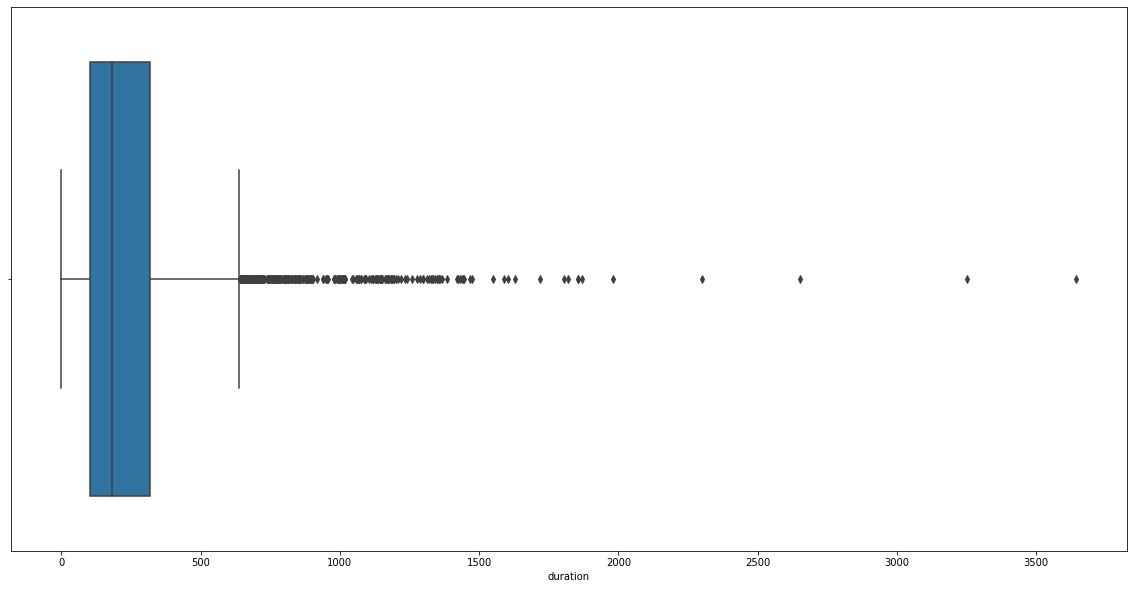

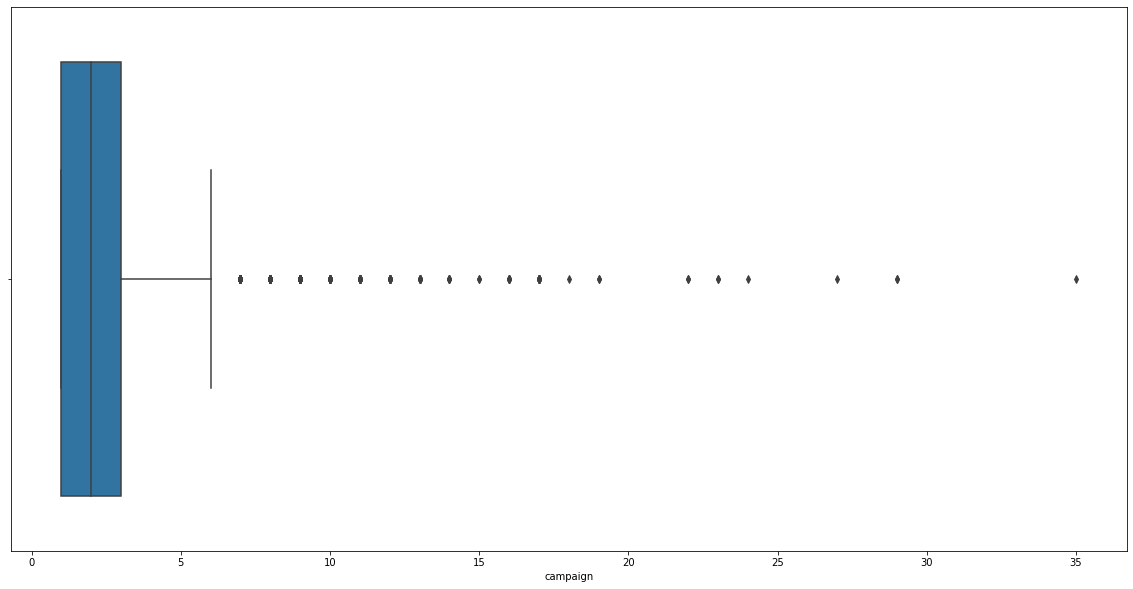

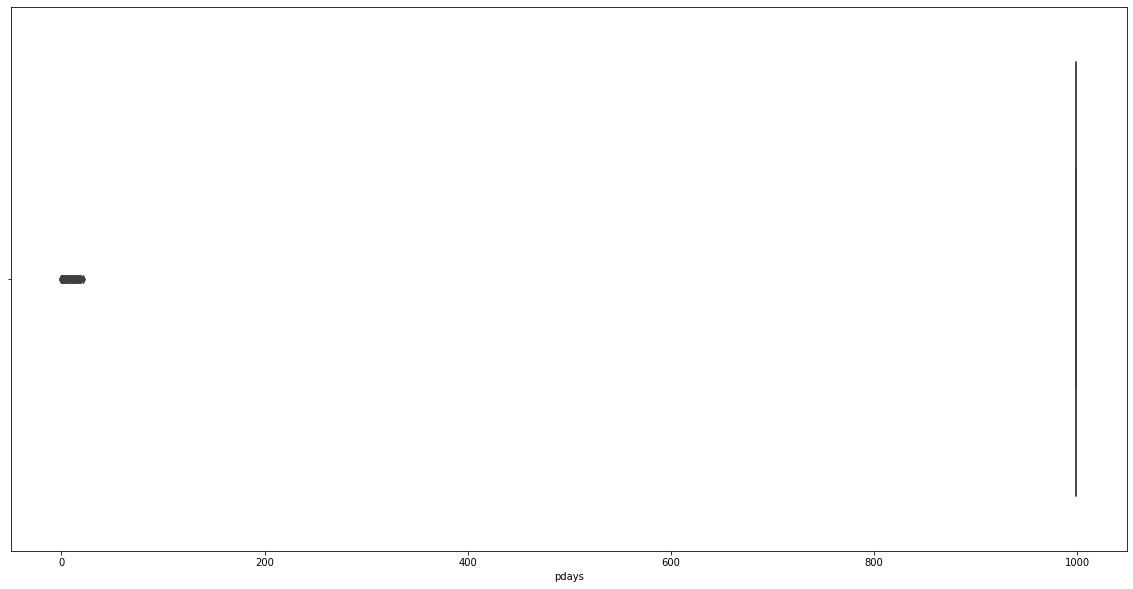

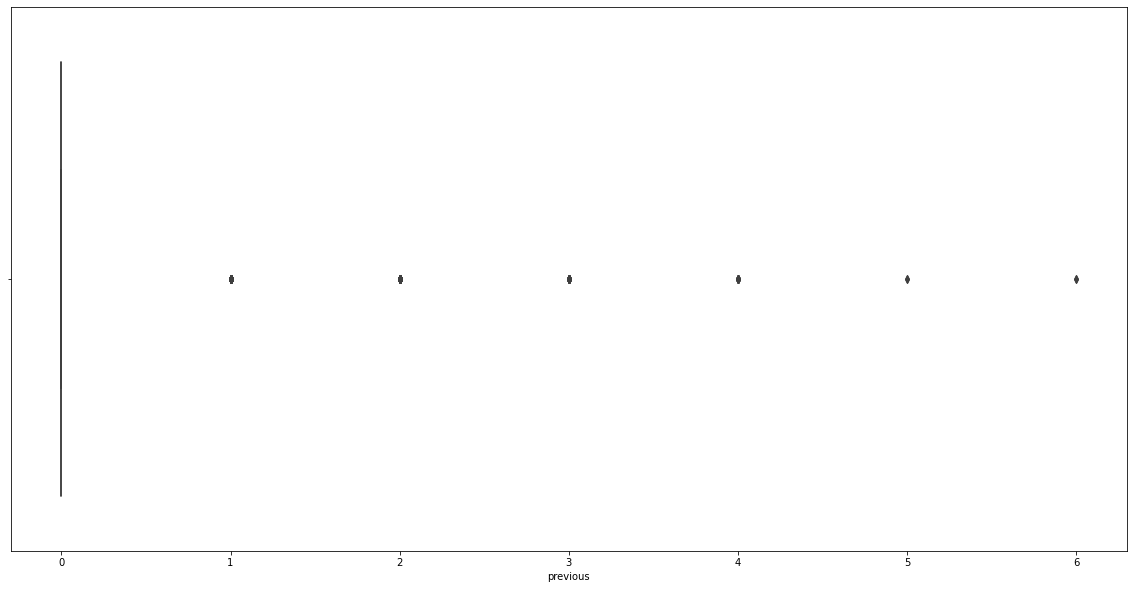

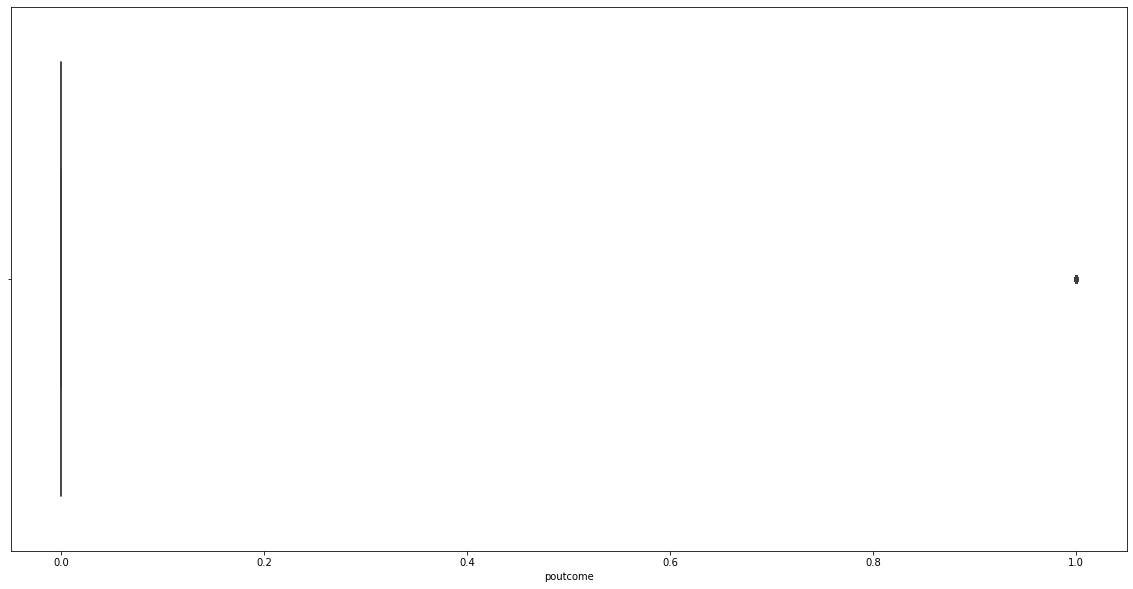

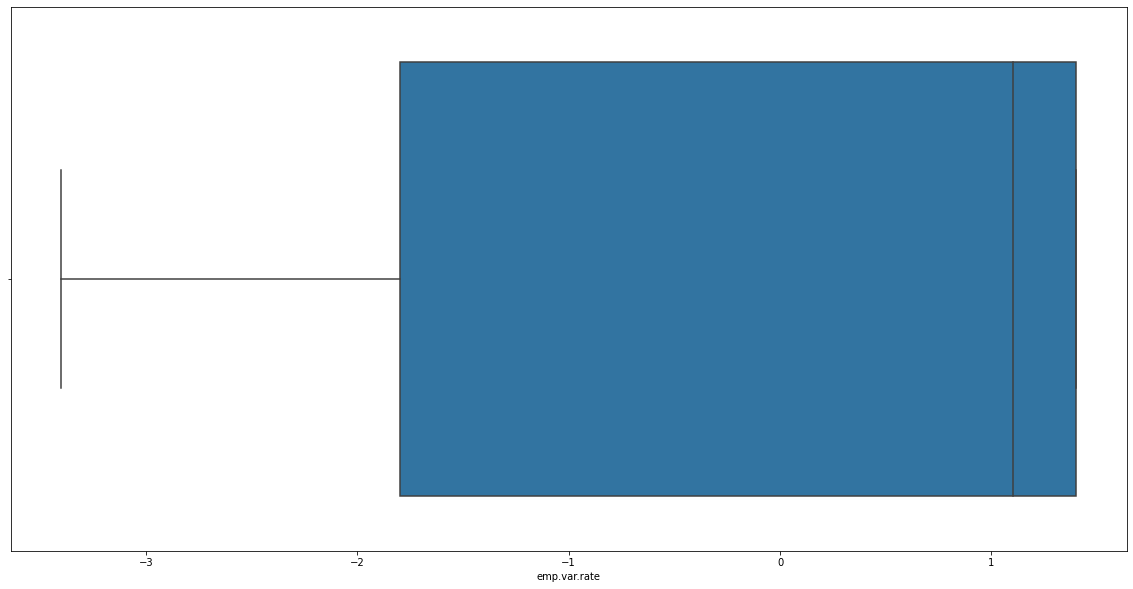

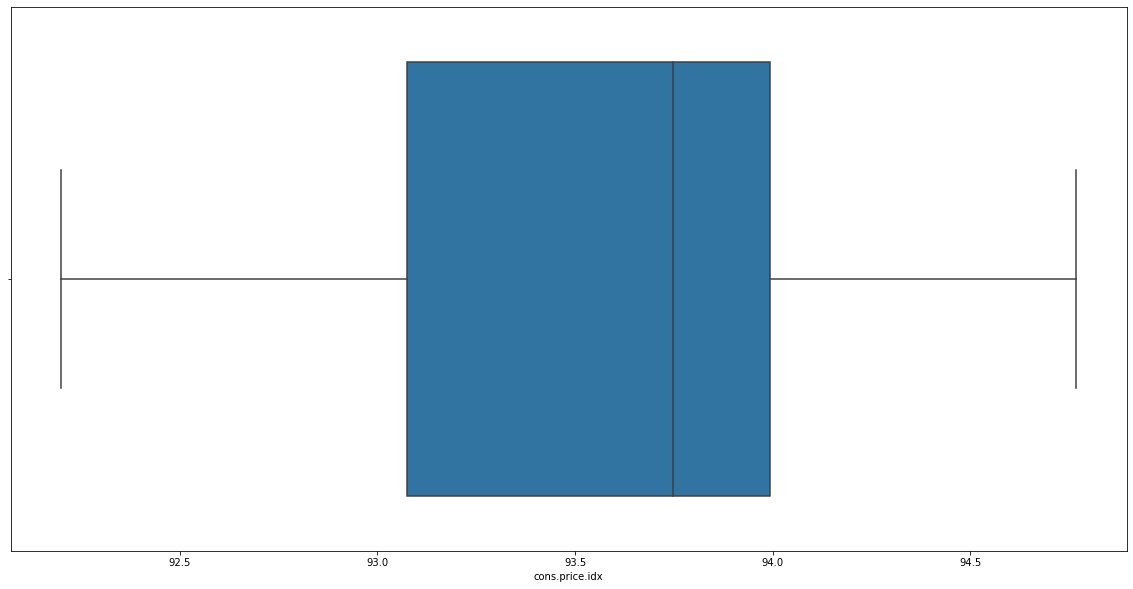

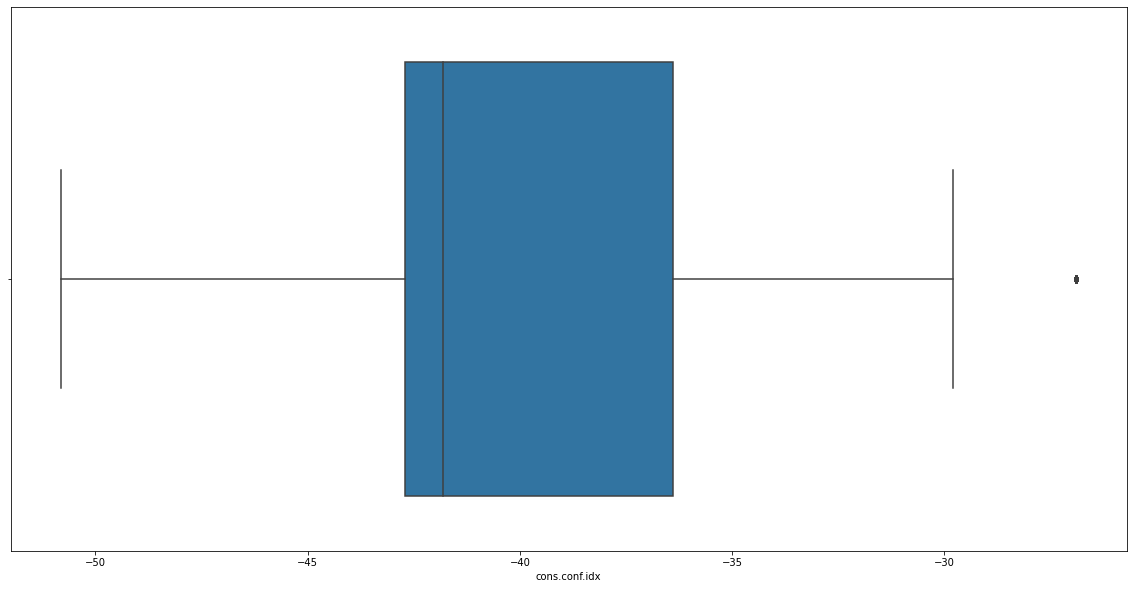

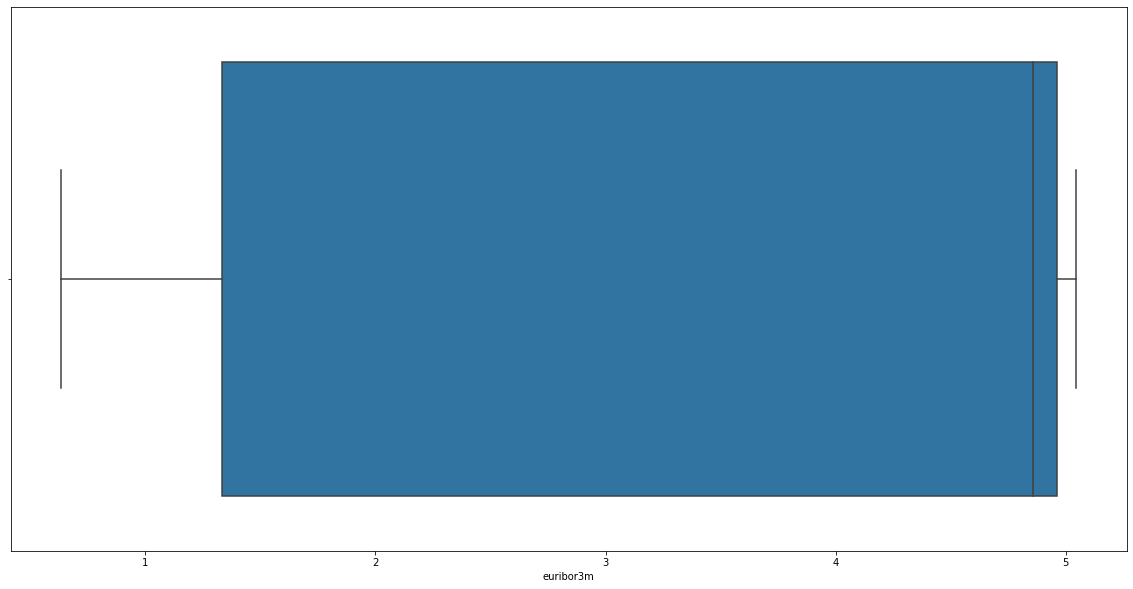

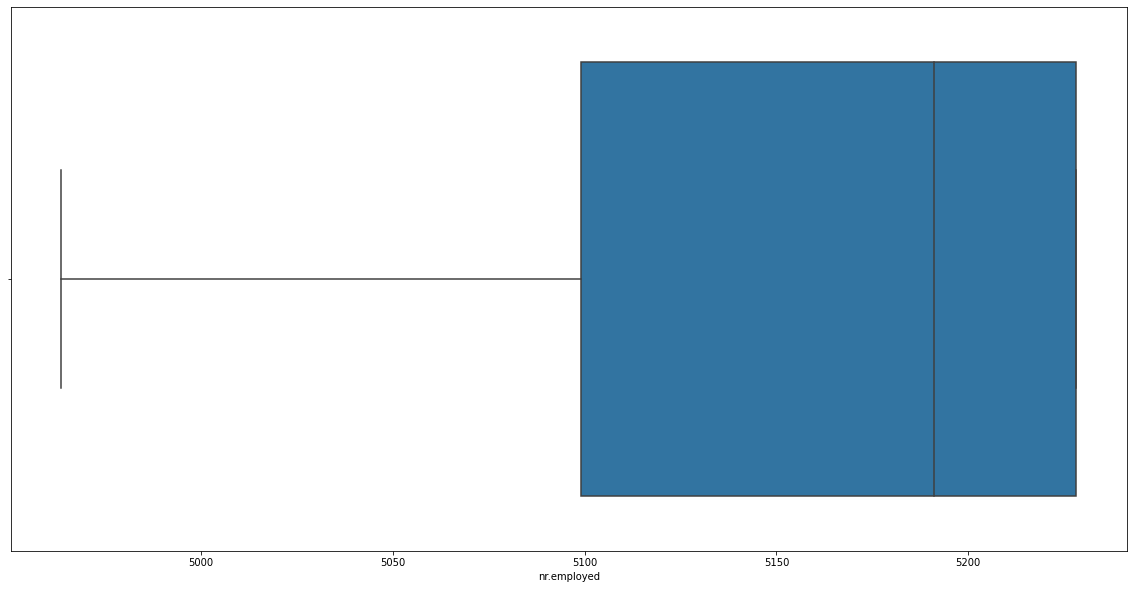

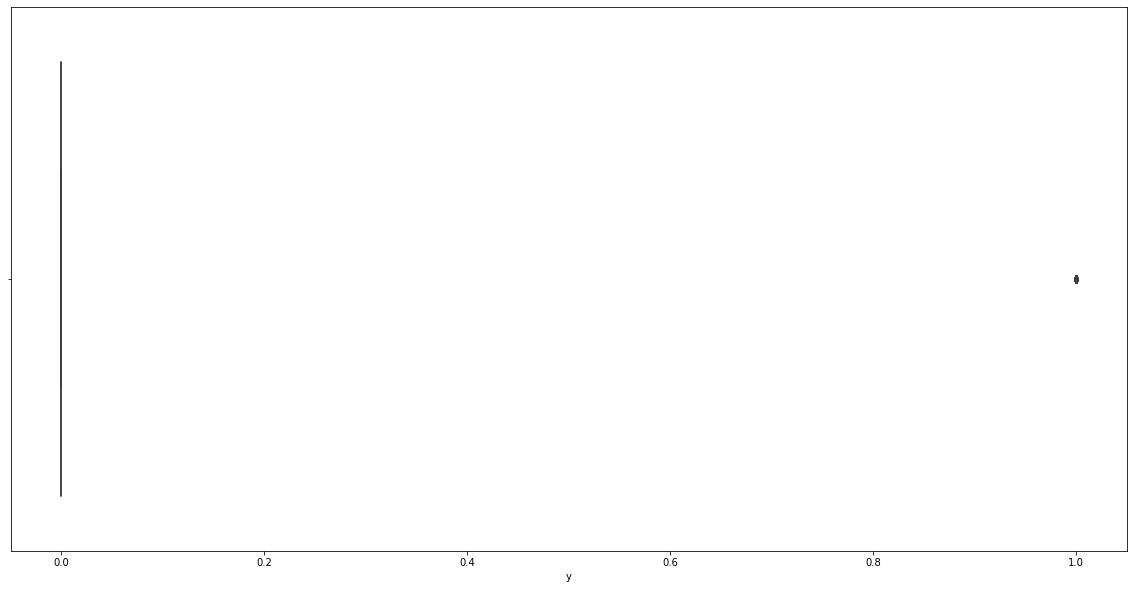

In [41]:
cols = df.columns.drop(['job', 'education', 'month'])
for i in range(0,len(cols)):
  plt.figure(figsize = (20,10))
  sns.boxplot(x = cols[i],data = df)

In [42]:
df.describe()

,age,marital,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,0.609128,0.000243,0.553532,0.161447,256.788055,2.537266,960.422190,0.190337,0.034474,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,0.488005,0.015581,0.497186,0.367987,254.703736,2.568159,191.922786,0.541788,0.182466,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,103.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,1.000000,0.000000,1.000000,0.000000,181.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,1.000000,0.000000,1.000000,0.000000,317.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,3643.000000,35.000000,999.000000,6.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Vemos que hay algunas variables distribuidas irregularmente como ``duration``, ``campaign``, ``pdays`` y ``previous``. En este caso como la variable dependiente es booleana no podemos hacer un estudio más amplio con respecto a las demás, así que intentaremos tratar las demás en la medida de lo posible.

Importamos stats para ver la distribución de las variables peor distribuidas aparentemente.


 mu = 256.79 and sigma = 254.67



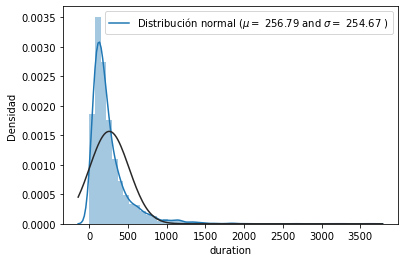

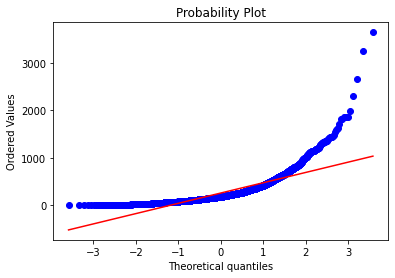

In [43]:
from scipy import stats

sns.distplot(df.duration, fit=stats.norm); 

(mu, sigma) = stats.norm.fit(df.duration)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')

fig = plt.figure()
res = stats.probplot(df.duration, plot=plt)
plt.show()


 mu = 2.54 and sigma = 2.57



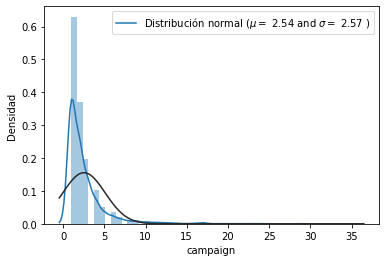

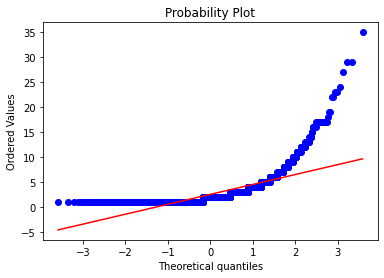

In [44]:
sns.distplot(df.campaign, fit=stats.norm); 

(mu, sigma) = stats.norm.fit(df.campaign)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')

fig = plt.figure()
res = stats.probplot(df.campaign, plot=plt)
plt.show()


 mu = 960.42 and sigma = 191.90



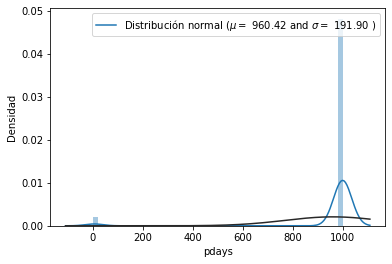

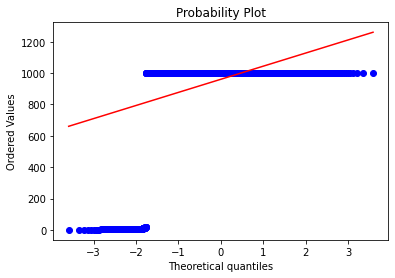

In [45]:
sns.distplot(df.pdays, fit=stats.norm); 

(mu, sigma) = stats.norm.fit(df.pdays)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')

fig = plt.figure()
res = stats.probplot(df.pdays, plot=plt)
plt.show()


 mu = 0.19 and sigma = 0.54



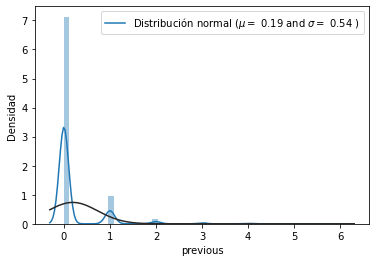

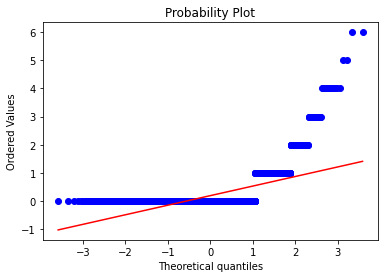

In [46]:
sns.distplot(df.previous, fit=stats.norm); 

(mu, sigma) = stats.norm.fit(df.previous)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')

fig = plt.figure()
res = stats.probplot(df.previous, plot=plt)
plt.show()

Vamos a escalar los valores.

In [47]:
%pip install sklearn
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_duration'] = rs.fit_transform(df['duration'].values.reshape(-1,1))
df['scaled_campaign'] = rs.fit_transform(df['campaign'].values.reshape(-1,1))
df['scaled_pdays'] = rs.fit_transform(df['pdays'].values.reshape(-1,1))
df['scaled_previous'] = rs.fit_transform(df['previous'].values.reshape(-1,1))

You should consider upgrading via the 'c:\Users\Outlo\Desktop\Updrade_hub\entorno_prueba\Scripts\python.exe -m pip install --upgrade pip' command.


In [48]:
df.drop(['duration', 'campaign', 'pdays', 'previous'], axis = 1, inplace = True)

Antes de aplicar algún modelo nos encargaremos de las tres columnas no numéricas que  nos quedan. Para ``job`` usaremos la función get_dummies, para ``education`` vamos a darle valores del 0 al 4 según considero que es mejor empezando en 0 para los analfabetos; y ``month`` la vamos a eliminar porque no merece la pena crear tantas columnas nuevas para el valor que aporta y no considero que tengan un orden de importancia claro.

In [49]:
cat = pd.get_dummies(df['job'])
df['education'].replace('illiterate', 0, inplace = True)
df['education'].replace('basic', 1, inplace = True)
df['education'].replace('high.school', 2, inplace = True)
df['education'].replace('professional.course', 3, inplace = True)
df['education'].replace('university.degree', 4, inplace = True)
df.drop(['month'], axis = 1, inplace = True)

In [50]:
df = df.join(cat)
df = df.drop(['job'], axis = 1)
df

,age,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,scaled_duration,scaled_campaign,scaled_pdays,scaled_previous,entrepreneur,management,services,technician,unemployed,worker
0,30,1,1,0,1,0,0,-1.8,92.893,-46.2,...,1.429907,0.0,0.0,0.0,0,0,0,0,0,1
1,39,0,2,0,0,0,0,1.1,93.994,-36.4,...,0.771028,1.0,0.0,0.0,0,0,1,0,0,0
2,25,1,2,0,1,0,0,1.4,94.465,-41.8,...,0.214953,-0.5,0.0,0.0,0,0,1,0,0,0
3,38,1,1,0,1,0,0,1.4,94.465,-41.8,...,-0.766355,0.5,0.0,0.0,0,0,1,0,0,0
4,47,1,4,0,1,0,0,-0.1,93.200,-42.0,...,-0.574766,-0.5,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,1,0,1,1,0,1.4,93.918,-42.7,...,-0.598131,-0.5,0.0,0.0,0,1,0,0,0,0
4115,39,1,2,0,1,0,0,1.4,93.918,-42.7,...,0.177570,-0.5,0.0,0.0,0,1,0,0,0,0
4116,27,0,2,0,0,0,0,-1.8,92.893,-46.2,...,-0.546729,0.0,0.0,1.0,0,0,0,0,1,0
4117,58,1,2,0,0,0,0,1.4,93.444,-36.1,...,1.621495,-0.5,0.0,0.0,0,1,0,0,0,0


Los valores 999 en pdays no los vamos a tocar porque tiene su lógica que sea un número alto el que represente que no ha habido contacto previo, puesto que se cuentan los días transcurridos desde el último contacto.

# Skewness

Observamos ahora la simetría de las variables numéricas, a fin de aplicar la transformación Box-Cox, una vez que todos nuestros registros son numéricos:

In [51]:
numeric_vars = df.select_dtypes(include = ['int', 'float'])

skewed_feats = numeric_vars.apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness)

                      Skew
default          64.156062
poutcome          5.103210
scaled_previous   4.021514
scaled_campaign   4.001727
scaled_duration   3.293581
y                 2.501198
loan              1.840249
age               0.715433
cons.conf.idx     0.287204
education         0.167672
housing          -0.215368
cons.price.idx   -0.216563
marital          -0.447297
euribor3m        -0.714819
emp.var.rate     -0.727423
nr.employed      -1.075485
scaled_pdays     -4.773400


In [ ]:
from scipy.special import boxcox1p #Librería
skewness = skewness.loc[abs(skewness.Skew) > 0.75,:] #Filtramos los que tengan un índice superior a .75
lambda_values = pd.Series(np.linspace(-2,2,40)) #Asignamos candidatos a índices de transformación
for var in skewness.index:
  skews = [stats.skew(boxcox1p(df[var], lam)) for lam in lambda_values]
  lam = lambda_values[pd.Series(np.abs(skews)).idxmin()] #Elegimos el índice óptimo
  df[var] = boxcox1p(df[var], lam)

# 4. Predicciones

Importamos las librerías necesarias.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report


from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

%pip install xgboost
from xgboost import XGBClassifier
import xgboost
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Outlo\Desktop\Updrade_hub\entorno_prueba\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Outlo\Desktop\Updrade_hub\entorno_prueba\Scripts\python.exe -m pip install --upgrade pip' command.


In [54]:
df.y.value_counts()

0.000000    3668
0.385562     451
Name: y, dtype: int64

In [55]:
df['y'].replace(0.38556242982784916, 1, inplace = True)
df['y'].replace(0.00000000000000000, 0, inplace = True)

In [56]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=55)

# Regresión Logística

In [57]:
# Creamos la instancia de nuestro modelo
lr = LogisticRegression()

In [58]:
# entrenamos el modelo con el set de datos de entrenamiento
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
# generamos predicciones para el set de datos de pruebas
y_predict = lr.predict(X_test)

In [60]:
# ahora vamos a ver qué tal lo ha hecho la regresión logística
pred_proba = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.7866231263698277

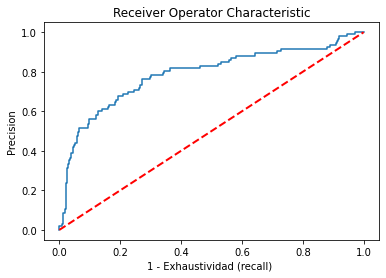

In [61]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [62]:
# Matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[731   0]
 [ 93   0]]


In [63]:
 # El F1-score, la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       731
         1.0       0.00      0.00      0.00        93

    accuracy                           0.89       824
   macro avg       0.44      0.50      0.47       824
weighted avg       0.79      0.89      0.83       824



# Regresión lineal

In [64]:
# creemos una nueva instancia del modelo 
lr_new = LinearRegression()

In [65]:
# entrenamos el modelo con el set de entrenamiento
lr_new.fit(X_train, y_train)

LinearRegression()

In [66]:
# Generamos predicciones para el set de pruebas
prediction_new = lr_new.predict(X_test)

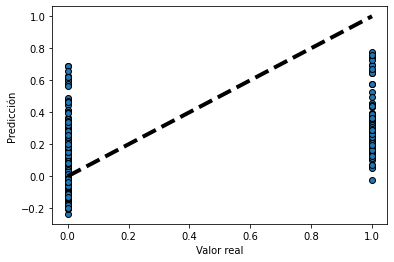

In [67]:
# Veamos la representación de los valores reales comparados con los valores 
# predichos por el modelo y luego calculemos el MSE
fig, ax = plt.subplots()
ax.scatter(y_test,prediction_new,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Predicción')
plt.show()

In [68]:
mse_new = mean_squared_error(y_test,prediction_new)
mse_new

0.07507320090916456

# Modelos de ensamblado

# XGBClassifier

In [69]:
# vamos a crear nuestra instancia del modelo
xgb = XGBClassifier()

In [70]:
# Entrenamos el modelo con el set de datos de entrenamiento
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [71]:
# Generar predicciones para el set de pruebas
y_predict = xgb.predict(X_test)

In [72]:
# ahora vamos a ver qué tal lo ha hecho el modelo XGBoost
pred_proba = xgb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.9133312739949694

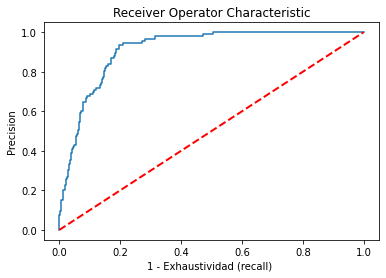

In [73]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [74]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[700  31]
 [ 56  37]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       731
         1.0       0.54      0.40      0.46        93

    accuracy                           0.89       824
   macro avg       0.74      0.68      0.70       824
weighted avg       0.88      0.89      0.89       824



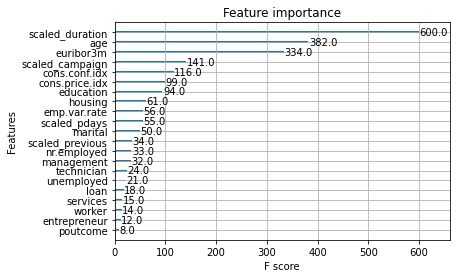

In [75]:
# Podemos ver cuáles de las variables de entrada
# tienen una mayor influencia a la hora de decidir la categoría en la que acaban siendo categorizados los datos
xgboost.plot_importance(xgb)
plt.show()

# Adaboost

In [76]:
adab = AdaBoostClassifier()
adab.fit(X_train, y_train)
y_predict = adab.predict(X_test)

In [77]:
pred_proba = adab.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc1 = auc(fpr, tpr)

roc_auc1

0.9243193151228983

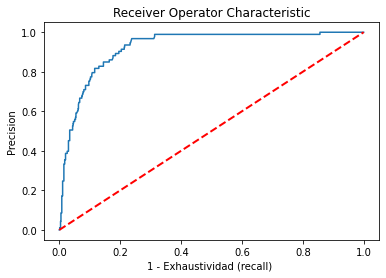

In [78]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [79]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[706  25]
 [ 46  47]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       731
         1.0       0.65      0.51      0.57        93

    accuracy                           0.91       824
   macro avg       0.80      0.74      0.76       824
weighted avg       0.91      0.91      0.91       824



In [80]:
features = X_train
feature_list = X_train.columns

# Guardamos los valores numéricos de la importancia de cada feature
importances = list(adab.feature_importances_)

# Vamos a crear un lista de tuplas con la variable independiente de entrada y su importancia
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ordenamos las importancias de las variables para tener las más importantes al principio
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostramos las variables y sus importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: scaled_duration      Importance: 0.34
Variable: euribor3m            Importance: 0.18
Variable: cons.conf.idx        Importance: 0.12
Variable: age                  Importance: 0.1
Variable: scaled_campaign      Importance: 0.08
Variable: emp.var.rate         Importance: 0.04
Variable: scaled_pdays         Importance: 0.04
Variable: cons.price.idx       Importance: 0.02
Variable: nr.employed          Importance: 0.02
Variable: entrepreneur         Importance: 0.02
Variable: technician           Importance: 0.02
Variable: unemployed           Importance: 0.02
Variable: marital              Importance: 0.0
Variable: education            Importance: 0.0
Variable: default              Importance: 0.0
Variable: housing              Importance: 0.0
Variable: loan                 Importance: 0.0
Variable: poutcome             Importance: 0.0
Variable: scaled_previous      Importance: 0.0
Variable: management           Importance: 0.0
Variable: services             Importance: 0.0
Va

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Importancias de las variables de entrada')

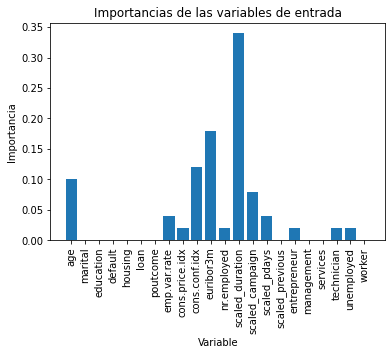

In [81]:
# Representación gráfica
# creamos una lista con tantas variables como vayamos a pintar
x_values = list(range(len(importances)))

# Creamos un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Ponemos los nombres de las variables en el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
# Ponemos los nombres de los ejes y el título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancias de las variables de entrada')

Por último vamos a validar nuestro modelo.

In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
# Preparamos el objeto que nos va a permitir separar los datos en los distintos grupos

cv = KFold( n_splits=10, random_state = 13, shuffle=True)
# Creamos el modelo que vamos a utilizar, seguimos con el clasificador de RandomForest
lr_kfcv = AdaBoostClassifier()
# El método de cross_val_score nos permite entrenar y validar el modelo directamente
medidas = cross_val_score(lr_kfcv, df.drop('y', axis=1), df['y'], scoring='accuracy', cv=cv)
precision_kfcv = mean(medidas)

print("Precision KFCV: %.3f" % precision_kfcv)

Precision KFCV: 0.913
